Alumnos:
* Kevin Alan Garcia Macias A01794867
* Gerardo Quiroga Najera A00967999
* Farid Krayem Pineda A00506281

In [ ]:
# 1. Montar Google Drive
from google.colab import drive
import os
import pandas as pd
import glob
import re

In [ ]:
print("Intentando montar Google Drive...")
try:
    drive.mount('/content/drive', force_remount=True) # force_remount=True puede ser útil si ya estaba montado
    print("¡Google Drive montado exitosamente!")
except Exception as e:
    print(f"Error al montar Google Drive: {e}")
    # Si hay un error aquí, el resto del código fallará.
    # Asegúrate de completar el proceso de autenticación en la ventana emergente.
    raise # Detiene la ejecución si no se pudo montar Drive

Intentando montar Google Drive...
Mounted at /content/drive
¡Google Drive montado exitosamente!


In [ ]:
csv_folder_path = '/content/drive/MyDrive/Maestría IA/Proyecto Integrador/data/search_console'

In [ ]:
# Verifica si la carpeta existe
if not os.path.isdir(csv_folder_path):
    print(f"ERROR: La carpeta especificada no existe: {csv_folder_path}")
    print("Por favor, verifica la ruta y asegúrate de que sea correcta.")
    # Puedes listar el contenido de MyDrive para ayudar a encontrar la ruta correcta:
    # print("\nContenido de /content/drive/MyDrive/:")
    # try:
    #     print(os.listdir('/content/drive/MyDrive/'))
    # except FileNotFoundError:
    #     print("No se pudo acceder a /content/drive/MyDrive/. ¿El montaje fue exitoso?")
else:
    print(f"Carpeta encontrada: {csv_folder_path}")

Carpeta encontrada: /content/drive/MyDrive/Maestría IA/Proyecto Integrador/data/search_console


In [ ]:
  # 3. Encontrar todos los archivos .csv en la carpeta especificada
search_pattern = os.path.join(csv_folder_path, '*.csv')
csv_files = glob.glob(search_pattern)

if not csv_files:
    print(f"No se encontraron archivos .csv en la carpeta: {csv_folder_path}")
    print("Asegúrate de que los archivos CSV estén directamente en esa carpeta y tengan la extensión .csv")
else:
    print(f"\nArchivos CSV encontrados ({len(csv_files)}):")
    for f in csv_files:
        print(f"- {os.path.basename(f)}") # Muestra solo el nombre del archivo

    # 4. Cargar cada archivo CSV en una variable de DataFrame SEPARADA
    print("\nCargando archivos en variables de DataFrame separadas...")
    print("--- ADVERTENCIA: Se crearán variables globales basadas en los nombres de archivo. ---")
    print("--- Asegúrate de que los nombres de archivo sean adecuados para nombres de variable. ---")

    loaded_variables = [] # Para llevar registro de las variables creadas

    for file_path in csv_files:
        try:
            # Obtener el nombre base del archivo (ej: 'datos_ventas' de 'datos_ventas.csv')
            file_name = os.path.basename(file_path)
            base_name = os.path.splitext(file_name)[0]

            # --- Crear un nombre de variable válido en Python ---
            # 1. Reemplaza espacios y guiones con guion bajo
            variable_name = base_name.replace(' ', '_').replace('-', '_')
            # 2. Elimina cualquier otro caracter no alfanumérico (excepto '_')
            variable_name = re.sub(r'[^\w]', '', variable_name)
            # 3. Si empieza con un número, añade 'df_' al principio
            if variable_name[0].isdigit():
                variable_name = f"df_{variable_name}"
            # 4. Verifica si es una palabra clave de Python (poco probable, pero seguro)
            import keyword
            if keyword.iskeyword(variable_name):
                  variable_name = f"{variable_name}_"
            # 5. Asegura que no quede vacío después de limpiar
            if not variable_name:
                variable_name = f"dataframe_{len(loaded_variables)}" # Nombre genérico si todo falla

            # --- Cargar el CSV en un DataFrame ---
            # Puedes añadir opciones a read_csv si es necesario (sep, encoding, decimal...)
            df = pd.read_csv(file_path)

            # --- Asignar el DataFrame a una variable global ---
            # Usamos globals() para crear/asignar la variable en el alcance global
            globals()[variable_name] = df
            loaded_variables.append(variable_name)

            print(f"  -> Archivo '{file_name}' cargado en la variable global llamada: '{variable_name}' (Forma: {df.shape})")

        except Exception as e:
            print(f"  -> ERROR al cargar el archivo '{os.path.basename(file_path)}': {e}")
            # Puedes decidir si continuar con los otros archivos o detenerte

    # ¡Listo! Ahora puedes acceder a tus DataFrames directamente por su nombre de variable
    print("\n¡Proceso completado!")
    if loaded_variables:
        print("Puedes acceder a cada DataFrame directamente usando el nombre de variable generado (listado arriba).")
        print("Variables creadas en el entorno global:")
        for var_name in loaded_variables:
            print(f"- {var_name}")
        # Ejemplo: si tenías 'ventas 2023.csv', probablemente se creó la variable 'ventas_2023'
        # Puedes usarla directamente: print(ventas_2023.head())
    else:
        print("No se cargó ningún DataFrame o no se crearon variables.")


Archivos CSV encontrados (7):
- Fechas.csv
- Consultas.csv
- Páginas.csv
- Filtros.csv
- Países.csv
- Aparición en búsquedas.csv
- Dispositivos.csv

Cargando archivos en variables de DataFrame separadas...
--- ADVERTENCIA: Se crearán variables globales basadas en los nombres de archivo. ---
--- Asegúrate de que los nombres de archivo sean adecuados para nombres de variable. ---
  -> Archivo 'Fechas.csv' cargado en la variable global llamada: 'Fechas' (Forma: (89, 5))
  -> Archivo 'Consultas.csv' cargado en la variable global llamada: 'Consultas' (Forma: (1000, 5))
  -> Archivo 'Páginas.csv' cargado en la variable global llamada: 'Paginas' (Forma: (212, 5))
  -> Archivo 'Filtros.csv' cargado en la variable global llamada: 'Filtros' (Forma: (2, 2))
  -> Archivo 'Países.csv' cargado en la variable global llamada: 'Paises' (Forma: (187, 5))
  -> Archivo 'Aparición en búsquedas.csv' cargado en la variable global llamada: 'Aparicion_en_busquedas' (Forma: (1, 5))
  -> Archivo 'Dispos

In [ ]:
Fechas.describe()

Clics  Impresiones   Posición
count  89.000000    89.000000  89.000000
mean   24.449438  1790.898876  13.859888
std     8.593088   314.935204   2.039567
min     6.000000  1083.000000   9.610000
25%    19.000000  1479.000000  12.440000
50%    24.000000  1887.000000  13.550000
75%    30.000000  2025.000000  15.650000
max    51.000000  2351.000000  18.890000

In [ ]:
Consultas.describe()

Clics   Impresiones     Posición
count  1000.000000   1000.000000  1000.000000
mean      0.584000     91.893000    25.163990
std       2.447639    426.726968    26.080831
min       0.000000      1.000000     1.000000
25%       0.000000     10.000000     4.837500
50%       0.000000     28.000000    11.725000
75%       0.000000     73.000000    41.665000
max      34.000000  11489.000000    98.890000

In [ ]:
Paginas.describe()

Clics   Impresiones    Posición
count  212.000000    212.000000  212.000000
mean    10.382075    883.636792   21.219198
std     33.505043   3276.140455   17.972989
min      0.000000      1.000000    1.000000
25%      0.000000     26.000000    8.310000
50%      1.000000    146.500000   15.490000
75%      6.000000    652.250000   29.257500
max    382.000000  34693.000000   95.170000

In [ ]:
Paises.describe()

Clics   Impresiones    Posición
count   187.000000    187.000000  187.000000
mean     11.636364    852.352941   36.874866
std     127.900736   6636.718903   18.772308
min       0.000000      1.000000    2.000000
25%       0.000000      4.000000   26.915000
50%       0.000000     27.000000   39.210000
75%       0.000000    164.500000   45.145000
max    1746.000000  89118.000000   96.000000

In [ ]:
Aparicion_en_busquedas.describe()

Clics  Impresiones  Posición
count    1.0          1.0      1.00
mean     8.0        176.0      6.98
std      NaN          NaN       NaN
min      8.0        176.0      6.98
25%      8.0        176.0      6.98
50%      8.0        176.0      6.98
75%      8.0        176.0      6.98
max      8.0        176.0      6.98

In [ ]:
Aparicion_en_busquedas.head()

Aparición en búsquedas  Clics  Impresiones    CTR  Posición
0  Fragmentos de productos      8          176  4.55%      6.98

In [ ]:
Dispositivos.describe()

Clics   Impresiones   Posición
count     3.000000      3.000000   3.000000
mean    725.333333  53130.000000  11.800000
std     636.595895  49467.280833   8.262717
min      16.000000    626.000000   5.150000
25%     464.500000  30263.500000   7.175000
50%     913.000000  59901.000000   9.200000
75%    1080.000000  79382.000000  15.125000
max    1247.000000  98863.000000  21.050000

# Mostrando la información general de cada dataframe

In [ ]:
# Lista de los nombres de las variables (DataFrames) que quieres inspeccionar
# Asegúrate de que estos nombres coincidan EXACTAMENTE con los nombres de las
# variables que se crearon en el paso anterior (pueden haber sido limpiados
# si los nombres de archivo originales tenían espacios, guiones, etc.)
nombres_dataframes = [
    "Fechas",
    "Consultas",
    "Paginas",
    "Filtros",
    "Paises",
    "Aparicion_en_busquedas",
    "Dispositivos"
]

print("Mostrando la información (.info()) para cada DataFrame especificado:\n")

for nombre_df in nombres_dataframes:
    print(f"--- Información para DataFrame: '{nombre_df}' ---")
    try:
        # Intenta acceder a la variable global con el nombre especificado
        # globals() devuelve un diccionario de las variables globales actuales
        dataframe_actual = globals()[nombre_df]

        # Verifica si es realmente un DataFrame de Pandas
        if isinstance(dataframe_actual, pd.DataFrame):
            # Llama al método .info() que imprime la información directamente
            dataframe_actual.info()
        else:
            # Si la variable existe pero no es un DataFrame
            print(f"ERROR: La variable '{nombre_df}' existe, pero no es un DataFrame de Pandas.")
            print(f"Tipo encontrado: {type(dataframe_actual)}")

    except NameError:
        # Si la variable con ese nombre no existe en el entorno global
        print(f"ERROR: No se encontró la variable (DataFrame) llamada '{nombre_df}'.")
        print("Posibles causas:")
        print("  - El archivo CSV correspondiente no existía o no se pudo cargar.")
        print("  - El nombre del archivo original fue modificado durante la limpieza para crear un nombre de variable válido (ej. 'Aparicion en busquedas' podría haberse convertido en 'Aparicion_en_busquedas').")
        print("  - Hubo un error de escritura en la lista 'nombres_dataframes'.")

    except Exception as e:
        # Captura cualquier otro error inesperado
        print(f"ERROR inesperado al intentar obtener información para '{nombre_df}': {e}")

    # Añade un salto de línea y un separador para mayor claridad entre DataFrames
    print("\n" + "="*60 + "\n")

print("Fin de la inspección de DataFrames.")

Mostrando la información (.info()) para cada DataFrame especificado:

--- Información para DataFrame: 'Fechas' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        89 non-null     object 
 1   Clics        89 non-null     int64  
 2   Impresiones  89 non-null     int64  
 3   CTR          89 non-null     object 
 4   Posición     89 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ KB


--- Información para DataFrame: 'Consultas' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Consultas principales  1000 non-null   object 
 1   Clics                  1000 non-null   int64  
 2   Impresiones            1000 non-null   int64  
 3   CTR    

In [ ]:
print("--- Análisis de Valores Faltantes en DataFrames ---\n")

for nombre_df in nombres_dataframes:
    print(f"\n--- Analizando '{nombre_df}' ---")
    try:
        # Intenta acceder a la variable global con el nombre especificado
        dataframe_actual = globals()[nombre_df]

        # Verifica si es realmente un DataFrame de Pandas
        if isinstance(dataframe_actual, pd.DataFrame):

            # --- Lógica para analizar valores faltantes ---

            # 1. Calcular el conteo de valores faltantes por columna
            missing_counts = dataframe_actual.isnull().sum()

            # 2. Filtrar para mostrar SÓLO las columnas que tienen valores faltantes (conteo > 0)
            columns_with_missing = missing_counts[missing_counts > 0]

            # --- Estructura IF/ELSE con indentación correcta ---
            if columns_with_missing.empty:
                # Si la Serie filtrada está vacía...
                print("  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!")
            else:
                # Si hay columnas con valores faltantes...
                print("  ❌ ¡Este DataFrame TIENE valores faltantes en las siguientes columnas:")

                # Información general sobre los faltantes en este DF
                total_rows = len(dataframe_actual)
                total_missing_in_df = columns_with_missing.sum()
                num_cols_with_missing = len(columns_with_missing)

                print(f"\n  Total de filas en el DataFrame: {total_rows}")
                print(f"  Número de columnas con valores faltantes: {num_cols_with_missing}")
                print(f"  Total de valores faltantes en el DataFrame: {total_missing_in_df}")
                print("\n  Detalle por columna:")

                # 3. Calcular el porcentaje para las columnas con valores faltantes
                missing_percentages = (columns_with_missing / total_rows) * 100

                # Mostrar el conteo y porcentaje por columna
                for col, count in columns_with_missing.items():
                    percentage = missing_percentages[col]
                    print(f"    - '{col}': {count} valores faltantes ({percentage:.2f}%)")

        else:
            # Si la variable existe pero no es un DataFrame
            print(f"  ERROR: La variable '{nombre_df}' existe, pero no es un DataFrame de Pandas.")
            print(f"  Tipo encontrado: {type(dataframe_actual)}")

    except NameError:
        # Si la variable con ese nombre no existe
        print(f"  ERROR: No se encontró la variable (DataFrame) llamada '{nombre_df}'.")
        print("  Asegúrate de que el nombre en la lista 'nombres_dataframes' es correcto y la variable fue creada.")

    except Exception as e:
        # Captura cualquier otro error inesperado
        print(f"  ERROR inesperado al intentar analizar valores faltantes para '{nombre_df}': {e}")
        # Opcional: imprimir más detalles del error para depuración
        # import traceback
        # traceback.print_exc(file=sys.stdout)


    # Añade un salto de línea y un separador para mayor claridad entre DataFrames
    print("\n" + "="*60 + "\n")

print("Fin del análisis de valores faltantes.")

--- Análisis de Valores Faltantes en DataFrames ---


--- Analizando 'Fechas' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!



--- Analizando 'Consultas' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!



--- Analizando 'Paginas' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!



--- Analizando 'Filtros' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!



--- Analizando 'Paises' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!



--- Analizando 'Aparicion_en_busquedas' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!



--- Analizando 'Dispositivos' ---
  ✅ ¡Este DataFrame no tiene valores faltantes en ninguna columna!


Fin del análisis de valores faltantes.


In [ ]:
print("--- Análisis de Sesgo (Skewness) en Columnas Numéricas ---\n")

# Diccionario para almacenar el sesgo de cada DataFrame
df_sesgo_results = {}

for nombre_df in nombres_dataframes:
    print(f"\n--- Analizando sesgo en '{nombre_df}' ---")
    try:
        dataframe_actual = globals()[nombre_df]

        if isinstance(dataframe_actual, pd.DataFrame):
            # Seleccionar solo columnas con tipos de datos numéricos
            df_numeric = dataframe_actual.select_dtypes(include=['number'])

            if not df_numeric.empty:
                # Calcular el sesgo para cada columna numérica
                # El método .skew() automáticamente maneja los valores faltantes (los ignora)
                skewness = df_numeric.skew()

                # Almacenar los resultados del sesgo
                df_sesgo_results[nombre_df] = skewness

                print("Valores de Sesgo (Skewness):")
                print(skewness)

                # Opcional: Identificar y mostrar solo columnas con sesgo "significativo"
                # Puedes ajustar el umbral (por ejemplo, 0.5 o 1.0)
                skewed_columns = skewness[skewness.abs() > 0.5].sort_values(ascending=False)

                if not skewed_columns.empty:
                    print(f"\nColumnas en '{nombre_df}' con sesgo absoluto > 0.5:")
                    print(skewed_columns)
                else:
                    print("\nNinguna columna numérica en este DataFrame tiene un sesgo absoluto mayor a 0.5.")

                # --- Opcional: Visualización de las distribuciones sesgadas ---
                if not skewed_columns.empty:
                     print(f"\nGenerando histogramas para columnas sesgadas (> 0.5) en '{nombre_df}'...")
                     # Ajustar el tamaño de las figuras si hay muchas columnas sesgadas
                     num_skewed = len(skewed_columns)
                     fig_height = max(4, num_skewed * 3) # Altura base 4, 3 por cada columna sesgada
                     plt.figure(figsize=(8, fig_height))
                     plt.suptitle(f'Histogramas para Columnas Sesgadas en {nombre_df}', y=1.02) # Título principal

                     for i, col in enumerate(skewed_columns.index):
                         plt.subplot(num_skewed, 1, i + 1) # Crear sub-gráficos
                         sns.histplot(data=dataframe_actual, x=col, kde=True) # Histograma con curva de densidad
                         plt.title(f'{col} (Sesgo: {skewness[col]:.2f})')
                         plt.xlabel('') # Ocultar etiquetas X duplicadas

                     plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar layout para evitar superposiciones
                     plt.show()


            else:
                print("  Este DataFrame no contiene columnas numéricas para analizar el sesgo.")

        else:
            print(f"  ERROR: La variable '{nombre_df}' existe, pero no es un DataFrame de Pandas.")
            print(f"  Tipo encontrado: {type(dataframe_actual)}")

    except NameError:
        print(f"  ERROR: No se encontró la variable (DataFrame) llamada '{nombre_df}'.")
        print("  Asegúrate de que el nombre en la lista 'nombres_dataframes' es correcto y la variable fue creada.")

    except Exception as e:
        print(f"  ERROR inesperado al intentar analizar el sesgo para '{nombre_df}': {e}")
        # import traceback
        # traceback.print_exc(file=sys.stdout)


    print("\n" + "="*60 + "\n")

print("Fin del análisis de sesgo.")

# Opcional: Puedes acceder a los resultados de sesgo para cada DF así:
# print("\nResumen de resultados de sesgo:")
# for df_name, skew_series in df_sesgo_results.items():
#     print(f"\nSesgo para '{df_name}':")
#     print(skew_series)

--- Análisis de Sesgo (Skewness) en Columnas Numéricas ---


--- Analizando sesgo en 'Fechas' ---
Valores de Sesgo (Skewness):
Clics          0.250416
Impresiones   -0.484487
Posición       0.338846
dtype: float64

Ninguna columna numérica en este DataFrame tiene un sesgo absoluto mayor a 0.5.



--- Analizando sesgo en 'Consultas' ---
Valores de Sesgo (Skewness):
Clics           9.002877
Impresiones    20.531725
Posición        1.075919
dtype: float64

Columnas en 'Consultas' con sesgo absoluto > 0.5:
Impresiones    20.531725
Clics           9.002877
Posición        1.075919
dtype: float64

Generando histogramas para columnas sesgadas (> 0.5) en 'Consultas'...
  ERROR: No se encontró la variable (DataFrame) llamada 'Consultas'.
  Asegúrate de que el nombre en la lista 'nombres_dataframes' es correcto y la variable fue creada.



--- Analizando sesgo en 'Paginas' ---
Valores de Sesgo (Skewness):
Clics          7.578443
Impresiones    7.970512
Posición       1.585866
dtype: float64

Col

--- Generando Matrices de Correlación para Columnas Numéricas ---


--- Matriz de Correlación para 'Fechas' ---
Matriz Numérica de Correlación:
                Clics  Impresiones  Posición
Clics        1.000000     0.751677 -0.394109
Impresiones  0.751677     1.000000 -0.631719
Posición    -0.394109    -0.631719  1.000000

Mapa de Calor de la Matriz de Correlación:


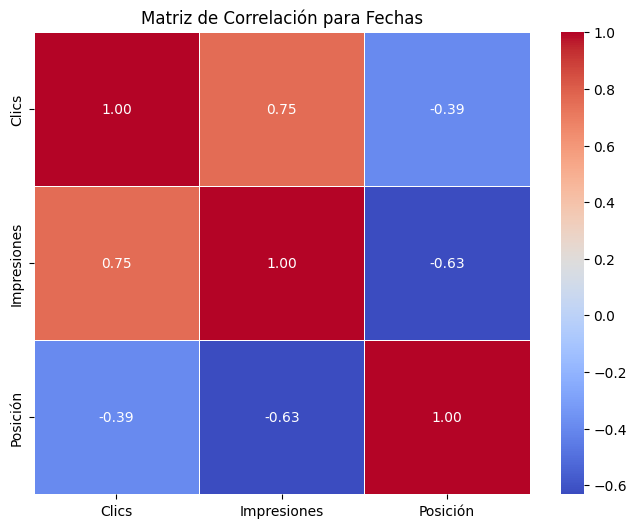




--- Matriz de Correlación para 'Consultas' ---
Matriz Numérica de Correlación:
                Clics  Impresiones  Posición
Clics        1.000000     0.304221 -0.174153
Impresiones  0.304221     1.000000 -0.059942
Posición    -0.174153    -0.059942  1.000000

Mapa de Calor de la Matriz de Correlación:


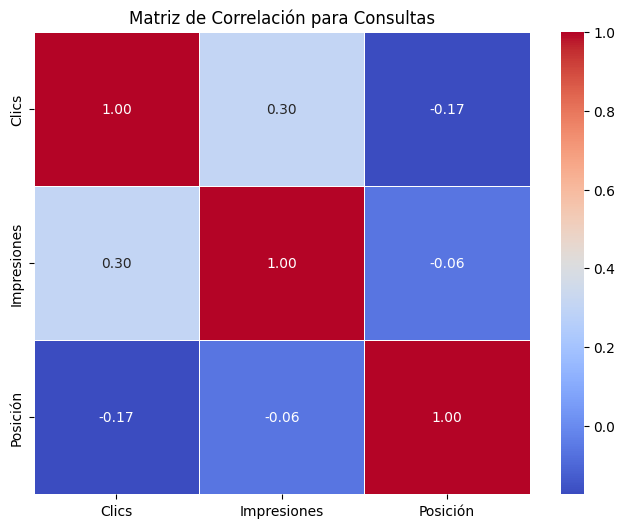




--- Matriz de Correlación para 'Paginas' ---
Matriz Numérica de Correlación:
                Clics  Impresiones  Posición
Clics        1.000000     0.719226 -0.147269
Impresiones  0.719226     1.000000 -0.099929
Posición    -0.147269    -0.099929  1.000000

Mapa de Calor de la Matriz de Correlación:


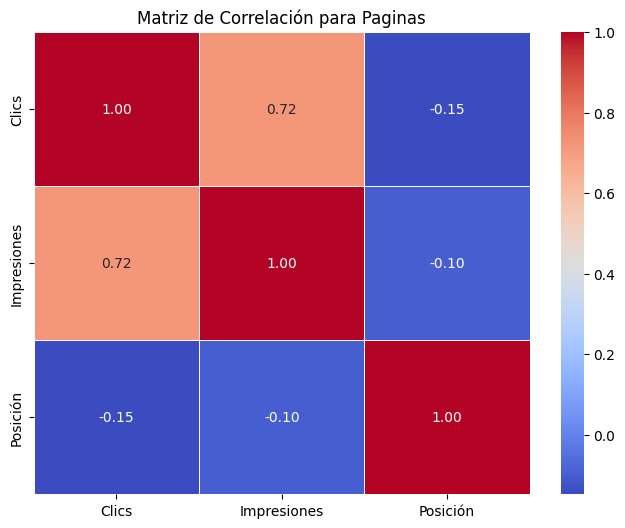




--- Matriz de Correlación para 'Filtros' ---
  Este DataFrame solo contiene una columna numérica (o ninguna). Se necesitan al menos dos para calcular la correlación entre pares.



--- Matriz de Correlación para 'Paises' ---
Matriz Numérica de Correlación:
                Clics  Impresiones  Posición
Clics        1.000000     0.988892 -0.146543
Impresiones  0.988892     1.000000 -0.159842
Posición    -0.146543    -0.159842  1.000000

Mapa de Calor de la Matriz de Correlación:


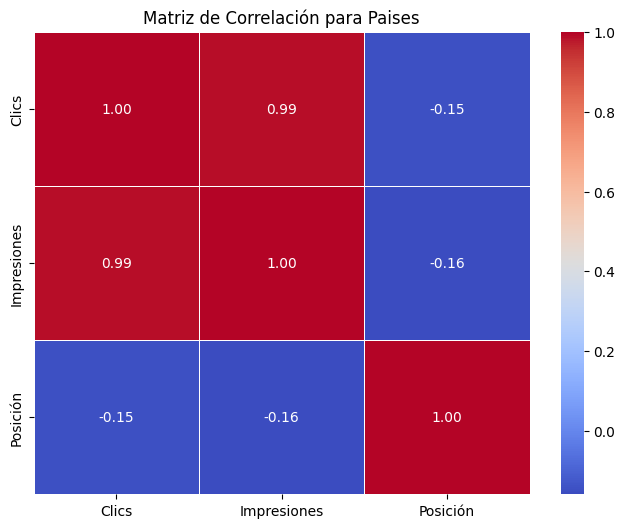




--- Matriz de Correlación para 'Aparicion_en_busquedas' ---
Matriz Numérica de Correlación:
             Clics  Impresiones  Posición
Clics          NaN          NaN       NaN
Impresiones    NaN          NaN       NaN
Posición       NaN          NaN       NaN

Mapa de Calor de la Matriz de Correlación:


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


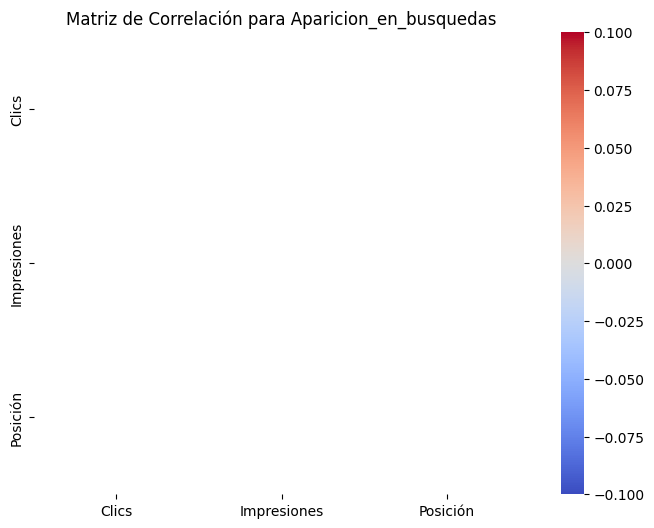




--- Matriz de Correlación para 'Dispositivos' ---
Matriz Numérica de Correlación:
                Clics  Impresiones  Posición
Clics        1.000000     0.990308  0.484471
Impresiones  0.990308     1.000000  0.358274
Posición     0.484471     0.358274  1.000000

Mapa de Calor de la Matriz de Correlación:


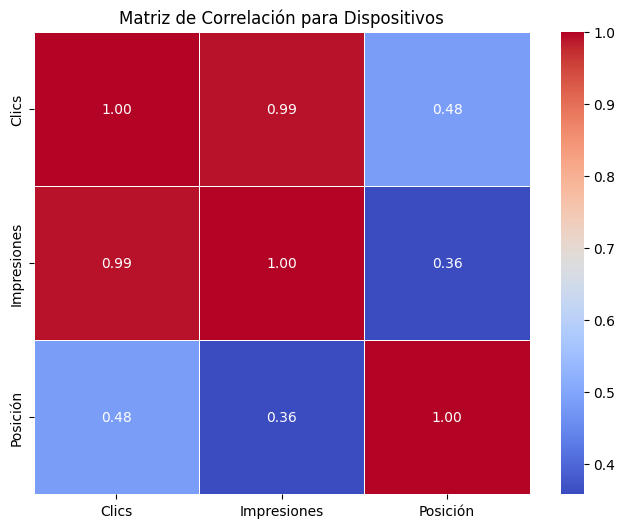



Fin de la generación de matrices de correlación.


In [ ]:
import seaborn as sns # Importar para el mapa de calor
import matplotlib.pyplot as plt # Importar para mostrar el gráfico

print("--- Generando Matrices de Correlación para Columnas Numéricas ---\n")

for nombre_df in nombres_dataframes:
    print(f"\n--- Matriz de Correlación para '{nombre_df}' ---")
    try:
        dataframe_actual = globals()[nombre_df]

        if isinstance(dataframe_actual, pd.DataFrame):
            # Seleccionar solo columnas con tipos de datos numéricos
            df_numeric = dataframe_actual.select_dtypes(include=['number'])

            if not df_numeric.empty and df_numeric.shape[1] > 1: # Asegurarse de que hay al menos 2 columnas numéricas
                # Calcular la matriz de correlación
                # El método .corr() ignora automáticamente los valores faltantes por defecto
                correlation_matrix = df_numeric.corr()

                print("Matriz Numérica de Correlación:")
                print(correlation_matrix)

                # --- Visualización como Mapa de Calor ---
                print("\nMapa de Calor de la Matriz de Correlación:")
                plt.figure(figsize=(8, 6)) # Ajustar tamaño de la figura si es necesario
                sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
                plt.title(f'Matriz de Correlación para {nombre_df}')
                plt.show()

            elif df_numeric.shape[1] <= 1:
                 print("  Este DataFrame solo contiene una columna numérica (o ninguna). Se necesitan al menos dos para calcular la correlación entre pares.")

            else: # df_numeric.empty es True
                print("  Este DataFrame no contiene columnas numéricas para calcular la matriz de correlación.")


        else:
            print(f"  ERROR: La variable '{nombre_df}' existe, pero no es un DataFrame de Pandas.")
            print(f"  Tipo encontrado: {type(dataframe_actual)}")

    except NameError:
        print(f"  ERROR: No se encontró la variable (DataFrame) llamada '{nombre_df}'.")
        print("  Asegúrate de que el nombre en la lista 'nombres_dataframes' es correcto y la variable fue creada.")

    except Exception as e:
        print(f"  ERROR inesperado al intentar generar la matriz de correlación para '{nombre_df}': {e}")
        # import traceback
        # traceback.print_exc(file=sys.stdout)

    print("\n" + "="*60 + "\n")

print("Fin de la generación de matrices de correlación.")

--- Iniciando Análisis Bivariado Automático (Numérica vs. Categórica) ---

>>> ATENCIÓN: Este proceso analizará CADA par de columna numérica vs. columna categórica (dtype object/category/bool) en cada DataFrame encontrado que tenga ambos tipos de columnas.
>>> La salida puede ser MUY extensa, con muchas tablas de estadísticas y gráficos generados consecutivamente.
>>> Si la salida es demasiado grande o lenta, considera detener la ejecución y usar el código anterior para analizar pares específicos de forma manual.



============================== Procesando DataFrame: 'Fechas' ==============================
  Columnas Numéricas encontradas (3): Clics, Impresiones, Posición
  Columnas Categóricas (por dtype) encontradas (2): Fecha, CTR
----------------------------------------------------------------------
  Procediendo a analizar 6 pares posibles (Numérica vs. Categórica)...
----------------------------------------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs

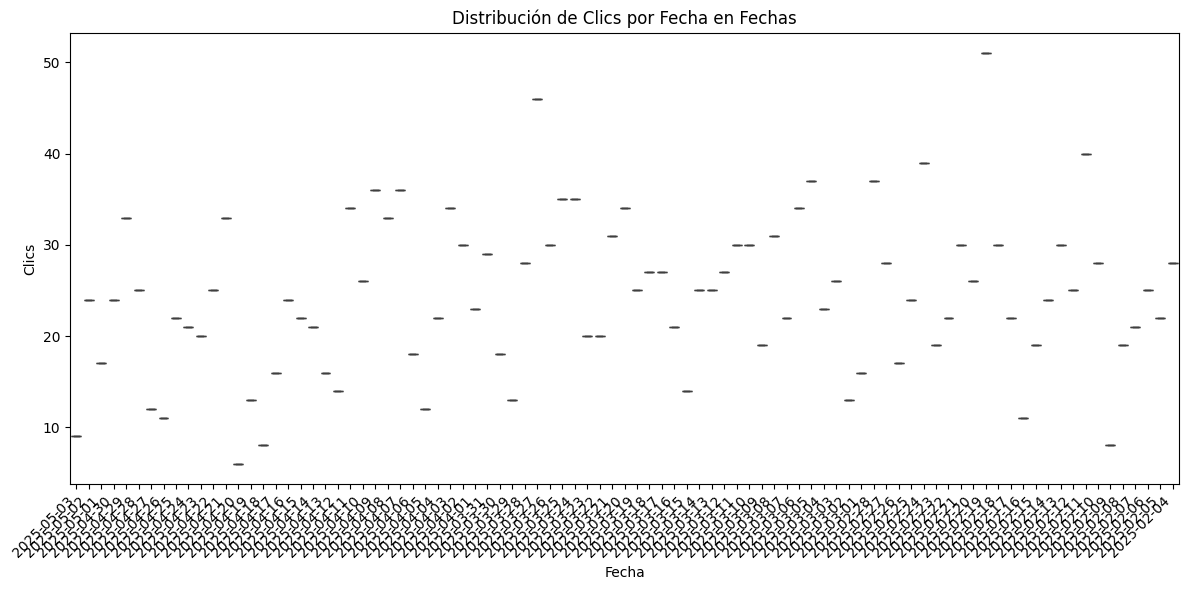

----------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'CTR' (Categórica) en 'Fechas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count  mean      std   min    25%   50%    75%   max
CTR                                                        
0.51%    1.0   6.0      NaN   6.0   6.00   6.0   6.00   6.0
0.58%    1.0   9.0      NaN   9.0   9.00   9.0   9.00   9.0
0.66%    1.0   8.0      NaN   8.0   8.00   8.0   8.00   8.0
0.74%    2.0   9.5  2.12132   8.0   8.75   9.5  10.25  11.0
0.77%    1.0  12.0      NaN  12.0  12.00  12.0  12.00  12.0
...      ...   ...      ...   ...    ...   ...    ...   ...
1.97%    1.0  39.0      NaN  39.0  39.00  39.0  39.00  39.0
1.99%    1.0  40.0      NaN  40.0  40.00  40.0  40.00  40.0
2%       1.0  37.0      NaN  37.0  37.00  37.0  37.00  37.0
2.2%     1.0  46.0      NaN  46.0  46.00  46.0  46.00  46.0
2.29%    1.0  51.0      NaN  51.0  51.00  51.0  51.00  51.0

[65 rows x 8 columns]

Genera

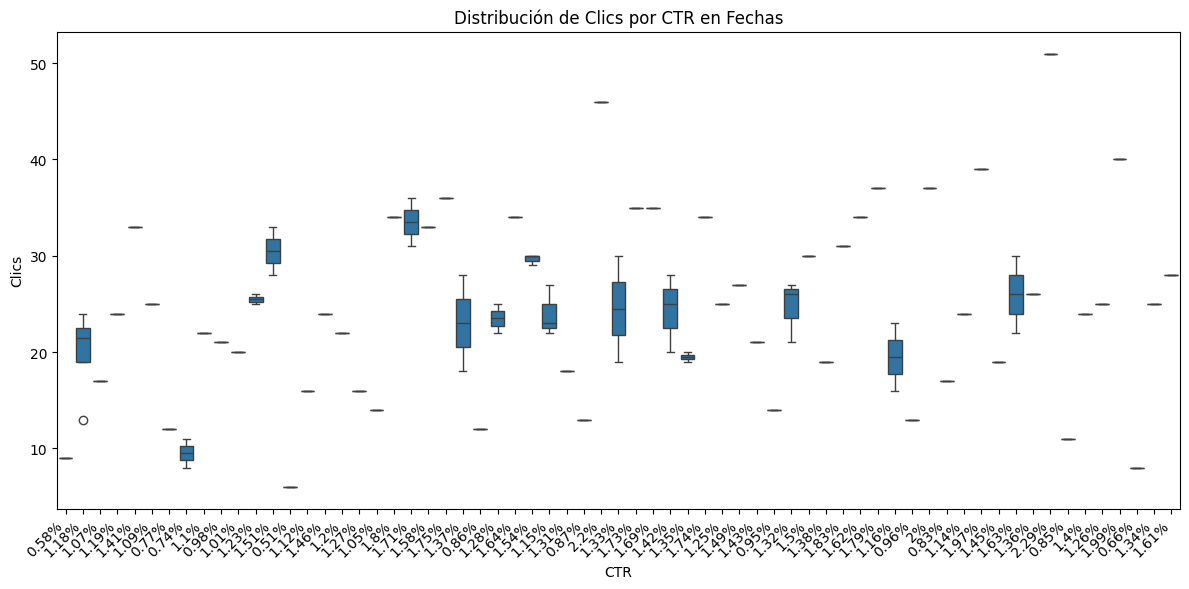

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'Fecha' (Categórica) en 'Fechas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
            count    mean  std     min     25%     50%     75%     max
Fecha                                                                 
2025-02-04    1.0  1740.0  NaN  1740.0  1740.0  1740.0  1740.0  1740.0
2025-02-05    1.0  1858.0  NaN  1858.0  1858.0  1858.0  1858.0  1858.0
2025-02-06    1.0  1867.0  NaN  1867.0  1867.0  1867.0  1867.0  1867.0
2025-02-07    1.0  1589.0  NaN  1589.0  1589.0  1589.0  1589.0  1589.0
2025-02-08    1.0  1429.0  NaN  1429.0  1429.0  1429.0  1429.0  1429.0
...           ...     ...  ...     ...     ...     ...     ...     ...
2025-04-29    1.0  2341.0  NaN  2341.0  2341.0  2341.0  2341.0  2341.0
2025-04-30    1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0
2025-05-01    1.0  1595.0  NaN  1595.0  1595.0  1595.0  1595.0  1595.0
2025-05-02    1.0  20

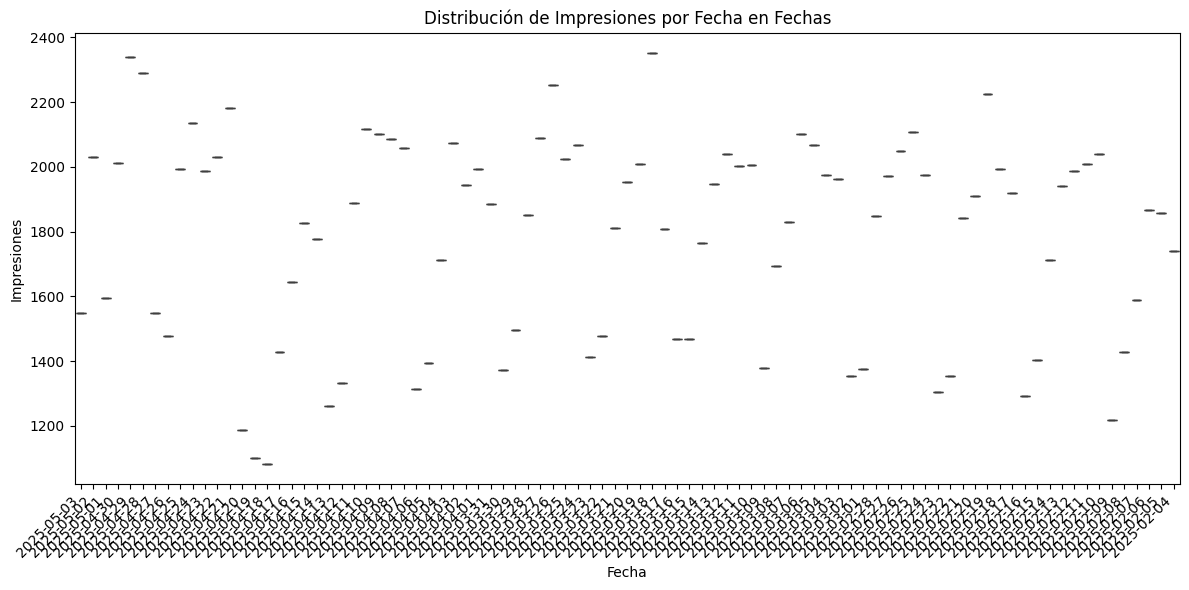

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'CTR' (Categórica) en 'Fechas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count    mean         std     min     25%     50%     75%     max
CTR                                                                     
0.51%    1.0  1187.0         NaN  1187.0  1187.0  1187.0  1187.0  1187.0
0.58%    1.0  1549.0         NaN  1549.0  1549.0  1549.0  1549.0  1549.0
0.66%    1.0  1219.0         NaN  1219.0  1219.0  1219.0  1219.0  1219.0
0.74%    2.0  1281.0  280.014285  1083.0  1182.0  1281.0  1380.0  1479.0
0.77%    1.0  1549.0         NaN  1549.0  1549.0  1549.0  1549.0  1549.0
...      ...     ...         ...     ...     ...     ...     ...     ...
1.97%    1.0  1976.0         NaN  1976.0  1976.0  1976.0  1976.0  1976.0
1.99%    1.0  2008.0         NaN  2008.0  2008.0  2008.0  2008.0  2008.0
2%       1.0  1847.0         NaN  1847.0  1847.0  1847.0  1847.0  1847.0
2

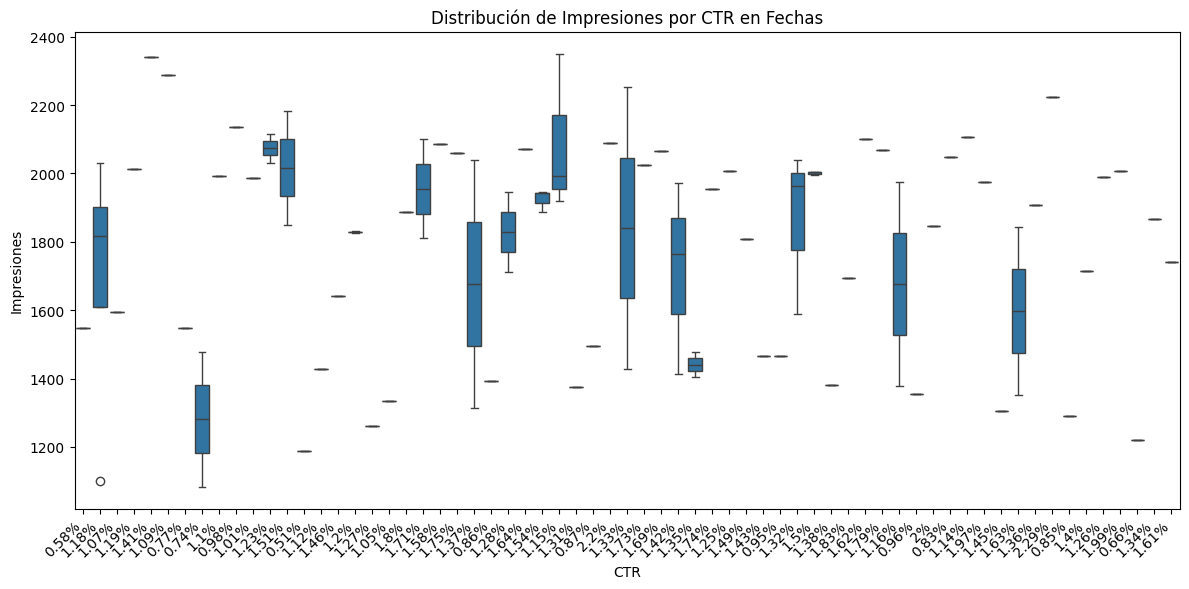

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'Fecha' (Categórica) en 'Fechas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
            count   mean  std    min    25%    50%    75%    max
Fecha                                                           
2025-02-04    1.0  13.91  NaN  13.91  13.91  13.91  13.91  13.91
2025-02-05    1.0  13.83  NaN  13.83  13.83  13.83  13.83  13.83
2025-02-06    1.0  13.49  NaN  13.49  13.49  13.49  13.49  13.49
2025-02-07    1.0  16.03  NaN  16.03  16.03  16.03  16.03  16.03
2025-02-08    1.0  17.77  NaN  17.77  17.77  17.77  17.77  17.77
...           ...    ...  ...    ...    ...    ...    ...    ...
2025-04-29    1.0  11.88  NaN  11.88  11.88  11.88  11.88  11.88
2025-04-30    1.0  11.37  NaN  11.37  11.37  11.37  11.37  11.37
2025-05-01    1.0  14.24  NaN  14.24  14.24  14.24  14.24  14.24
2025-05-02    1.0  11.53  NaN  11.53  11.53  11.53  11.53  11.53
2025-05-03    1.0  14.19 

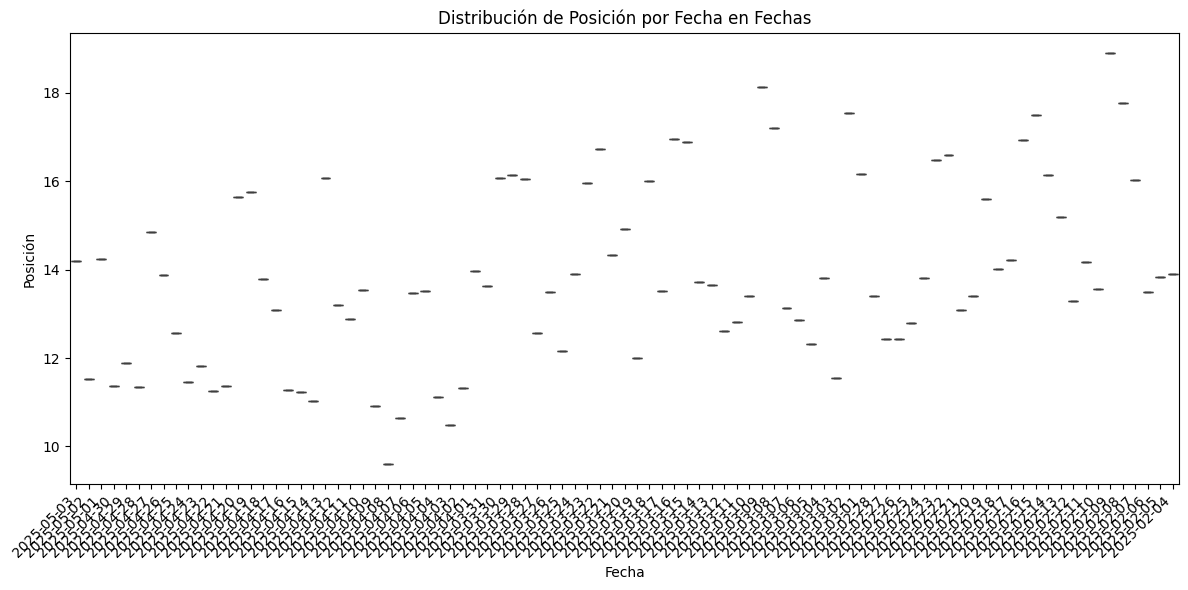

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'CTR' (Categórica) en 'Fechas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count    mean      std    min      25%     50%      75%    max
CTR                                                                  
0.51%    1.0  15.650      NaN  15.65  15.6500  15.650  15.6500  15.65
0.58%    1.0  14.190      NaN  14.19  14.1900  14.190  14.1900  14.19
0.66%    1.0  18.890      NaN  18.89  18.8900  18.890  18.8900  18.89
0.74%    2.0  13.835  0.06364  13.79  13.8125  13.835  13.8575  13.88
0.77%    1.0  14.840      NaN  14.84  14.8400  14.840  14.8400  14.84
...      ...     ...      ...    ...      ...     ...      ...    ...
1.97%    1.0  13.800      NaN  13.80  13.8000  13.800  13.8000  13.80
1.99%    1.0  14.170      NaN  14.17  14.1700  14.170  14.1700  14.17
2%       1.0  13.400      NaN  13.40  13.4000  13.400  13.4000  13.40
2.2%     1.0  12.560      NaN  12.56 

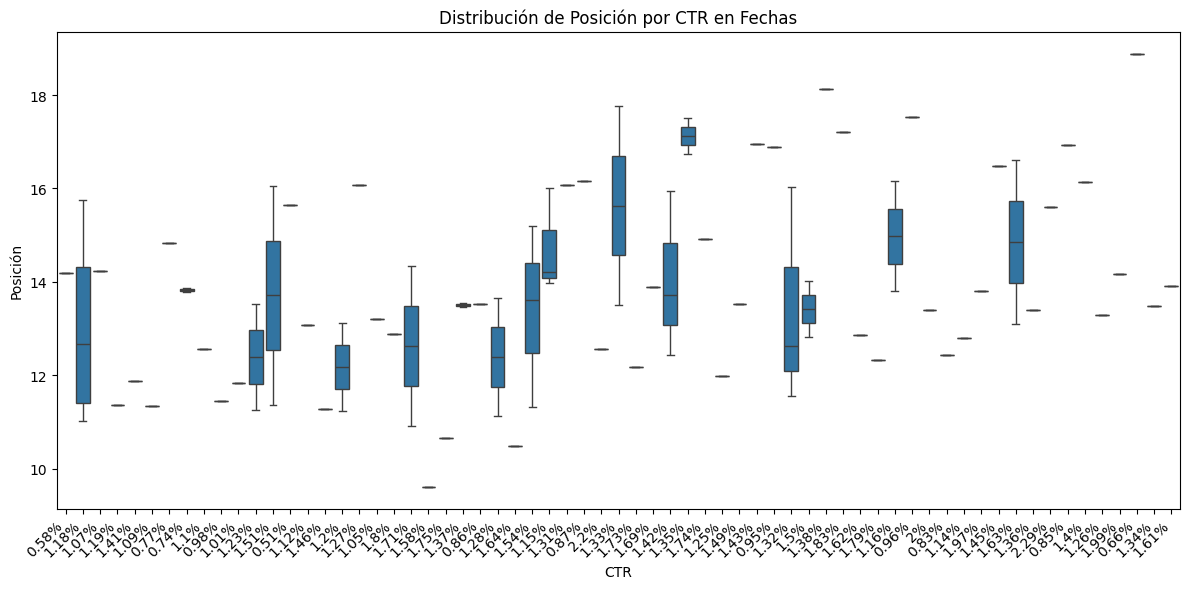

----------------------------------------

============================== Fin Análisis para DataFrame: 'Fechas' ==============================


============================== Procesando DataFrame: 'Consultas' ==============================
  Columnas Numéricas encontradas (3): Clics, Impresiones, Posición
  Columnas Categóricas (por dtype) encontradas (2): Consultas principales, CTR
----------------------------------------------------------------------
  Procediendo a analizar 6 pares posibles (Numérica vs. Categórica)...
----------------------------------------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'Consultas principales' (Categórica) en 'Consultas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
                       count  mean  std  min  25%  50%  75%  max
Consultas principales                                           
3/24                     1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
5011                     1.0   0.0  

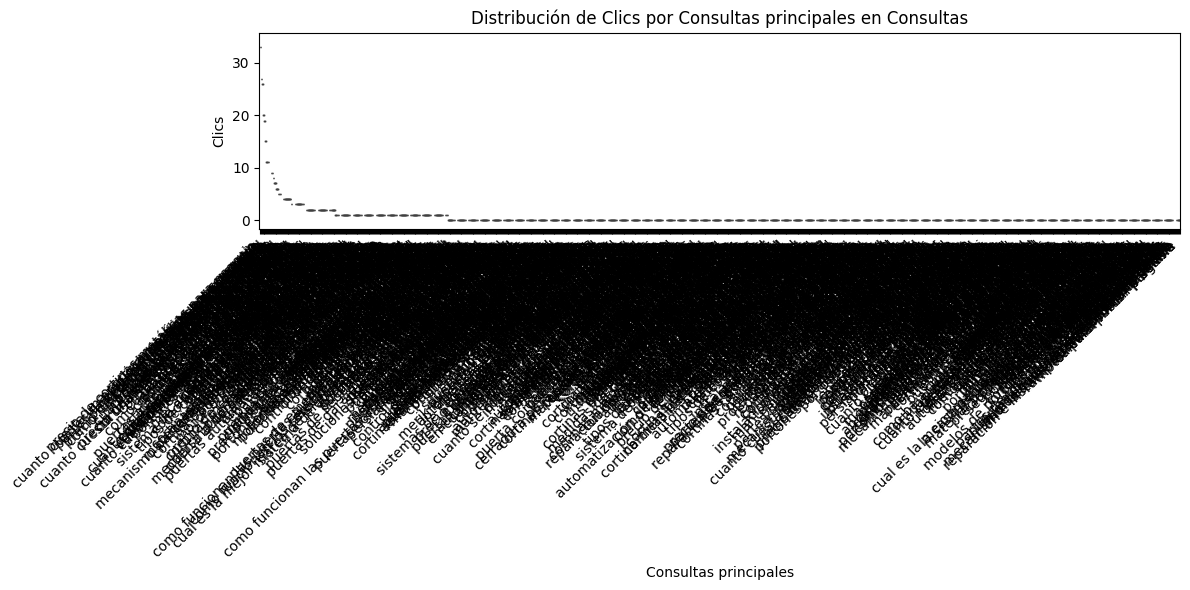

----------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'CTR' (Categórica) en 'Consultas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count  mean       std  min   25%  50%   75%  max
CTR                                                    
0%     795.0   0.0  0.000000  0.0  0.00  0.0  0.00  0.0
0.06%    1.0   1.0       NaN  1.0  1.00  1.0  1.00  1.0
0.08%    1.0   9.0       NaN  9.0  9.00  9.0  9.00  9.0
0.12%    1.0   1.0       NaN  1.0  1.00  1.0  1.00  1.0
0.13%    2.0   2.5  0.707107  2.0  2.25  2.5  2.75  3.0
...      ...   ...       ...  ...   ...  ...   ...  ...
7.77%    1.0   8.0       NaN  8.0  8.00  8.0  8.00  8.0
8.33%    2.0   1.0  0.000000  1.0  1.00  1.0  1.00  1.0
8.7%     1.0   2.0       NaN  2.0  2.00  2.0  2.00  2.0
8.82%    1.0   3.0       NaN  3.0  3.00  3.0  3.00  3.0
9.09%    3.0   1.0  0.000000  1.0  1.00  1.0  1.00  1.0

[131 rows x 8 columns]

Generando Box Plot para 'Clics' por 'CTR'...


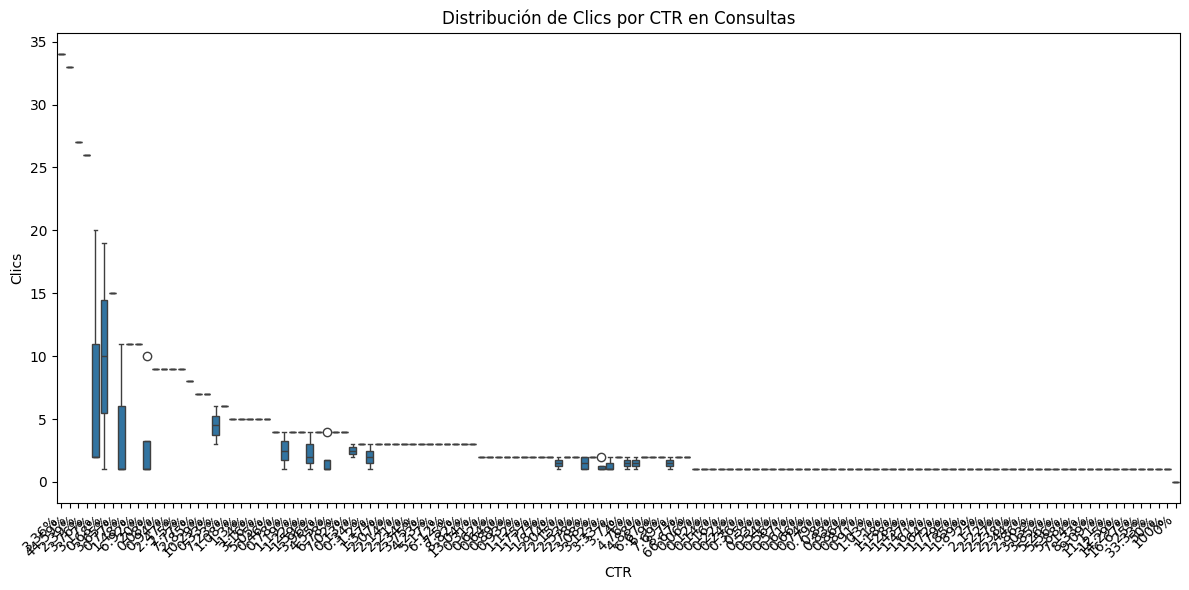

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'Consultas principales' (Categórica) en 'Consultas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
                       count   mean  std    min    25%    50%    75%    max
Consultas principales                                                      
3/24                     1.0   15.0  NaN   15.0   15.0   15.0   15.0   15.0
5011                     1.0  103.0  NaN  103.0  103.0  103.0  103.0  103.0
7512w                    1.0   29.0  NaN   29.0   29.0   29.0   29.0   29.0
7512w merik              1.0   57.0  NaN   57.0   57.0   57.0   57.0   57.0
abatibles puertas        1.0   35.0  NaN   35.0   35.0   35.0   35.0   35.0
...                      ...    ...  ...    ...    ...    ...    ...    ...
vertical lift            1.0  116.0  NaN  116.0  116.0  116.0  116.0  116.0
vulcan erreka            1.0   29.0  NaN   29.0   29.0   29.0   29.0   29.0
zaguanes automaticos   

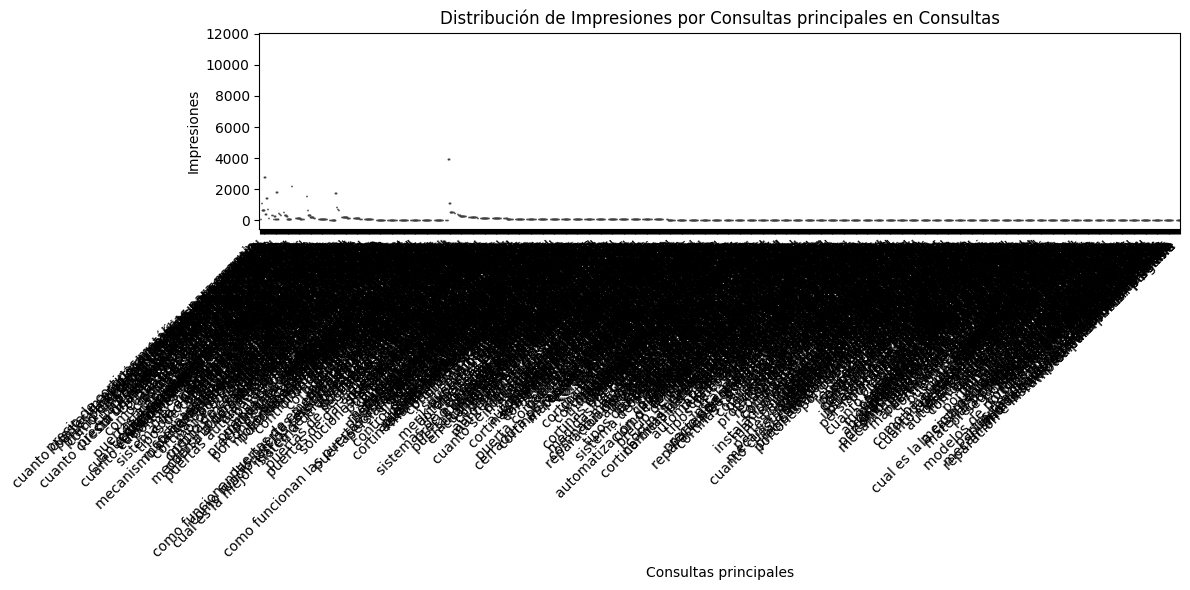

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'CTR' (Categórica) en 'Consultas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count          mean         std      min      25%      50%      75%  \
CTR                                                                          
0%     795.0     53.254088  158.993658      6.0     10.0     23.0     61.5   
0.06%    1.0   1738.000000         NaN   1738.0   1738.0   1738.0   1738.0   
0.08%    1.0  11489.000000         NaN  11489.0  11489.0  11489.0  11489.0   
0.12%    1.0    841.000000         NaN    841.0    841.0    841.0    841.0   
0.13%    2.0   1884.000000  496.388960   1533.0   1708.5   1884.0   2059.5   
...      ...           ...         ...      ...      ...      ...      ...   
7.77%    1.0    103.000000         NaN    103.0    103.0    103.0    103.0   
8.33%    2.0     12.000000    0.000000     12.0     12.0     12.0     12.0   
8.7%     1.0     23.0

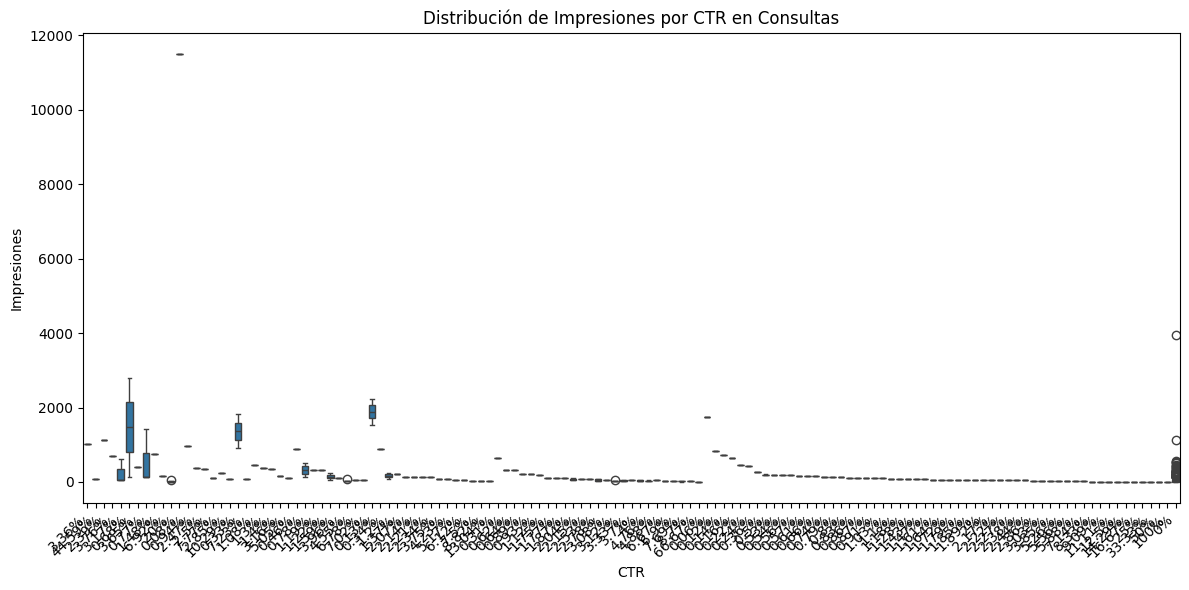

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'Consultas principales' (Categórica) en 'Consultas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
                       count   mean  std    min    25%    50%    75%    max
Consultas principales                                                      
3/24                     1.0  10.20  NaN  10.20  10.20  10.20  10.20  10.20
5011                     1.0   7.84  NaN   7.84   7.84   7.84   7.84   7.84
7512w                    1.0   2.24  NaN   2.24   2.24   2.24   2.24   2.24
7512w merik              1.0   2.04  NaN   2.04   2.04   2.04   2.04   2.04
abatibles puertas        1.0  48.83  NaN  48.83  48.83  48.83  48.83  48.83
...                      ...    ...  ...    ...    ...    ...    ...    ...
vertical lift            1.0   4.40  NaN   4.40   4.40   4.40   4.40   4.40
vulcan erreka            1.0   9.79  NaN   9.79   9.79   9.79   9.79   9.79
zaguanes automaticos     1

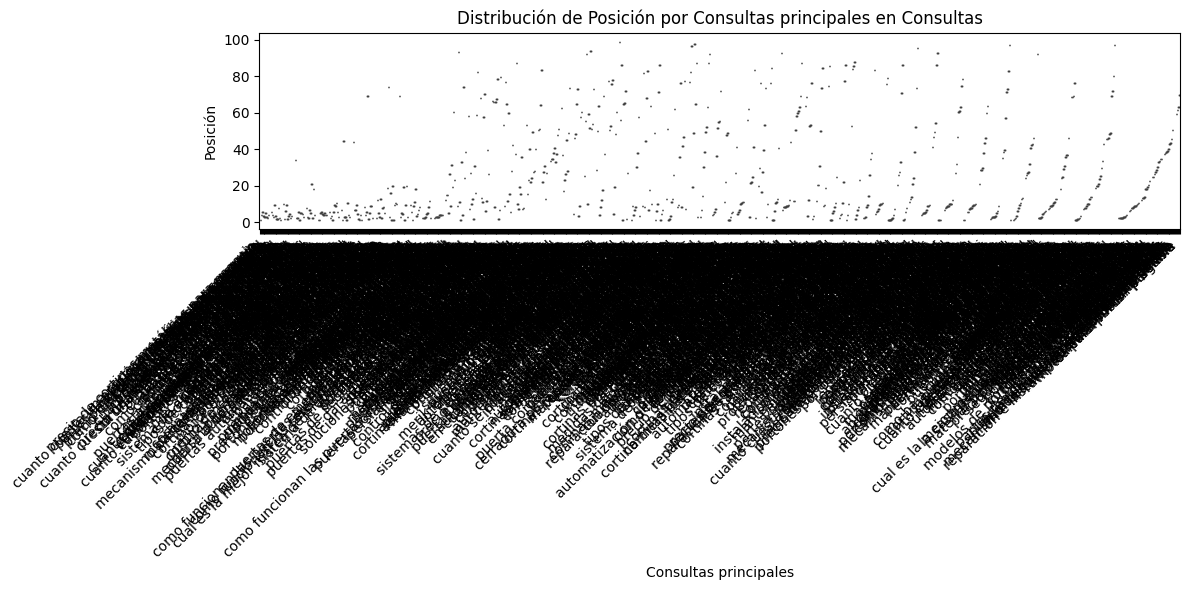

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'CTR' (Categórica) en 'Consultas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count       mean        std    min      25%     50%      75%    max
CTR                                                                       
0%     795.0  29.402906  26.903708   1.00   7.2100  19.330  49.6900  98.89
0.06%    1.0   8.690000        NaN   8.69   8.6900   8.690   8.6900   8.69
0.08%    1.0   8.270000        NaN   8.27   8.2700   8.270   8.2700   8.27
0.12%    1.0  10.500000        NaN  10.50  10.5000  10.500  10.5000  10.50
0.13%    2.0   5.725000   3.189052   3.47   4.5975   5.725   6.8525   7.98
...      ...        ...        ...    ...      ...     ...      ...    ...
7.77%    1.0   2.630000        NaN   2.63   2.6300   2.630   2.6300   2.63
8.33%    2.0  11.665000  10.373256   4.33   7.9975  11.665  15.3325  19.00
8.7%     1.0   5.520000        NaN   5.52   5.5200   5

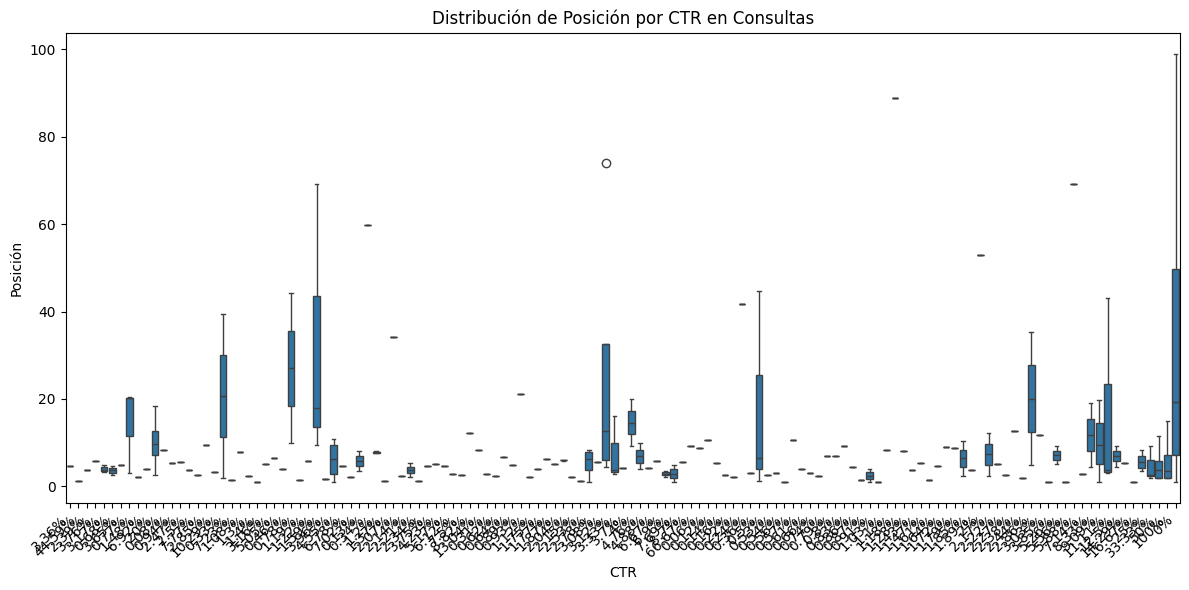

----------------------------------------

============================== Fin Análisis para DataFrame: 'Consultas' ==============================


============================== Procesando DataFrame: 'Paginas' ==============================
  Columnas Numéricas encontradas (3): Clics, Impresiones, Posición
  Columnas Categóricas (por dtype) encontradas (2): Páginas principales, CTR
----------------------------------------------------------------------
  Procediendo a analizar 6 pares posibles (Numérica vs. Categórica)...
----------------------------------------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'Páginas principales' (Categórica) en 'Paginas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
                                                    count  mean  std   min  \
Páginas principales                                                          
https://scosnaya.mx/                                  1.0  72.0  NaN  72.0   
ht

<ipython-input-29-7d95cf0644c7>:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ajustar para evitar que las etiquetas se corten


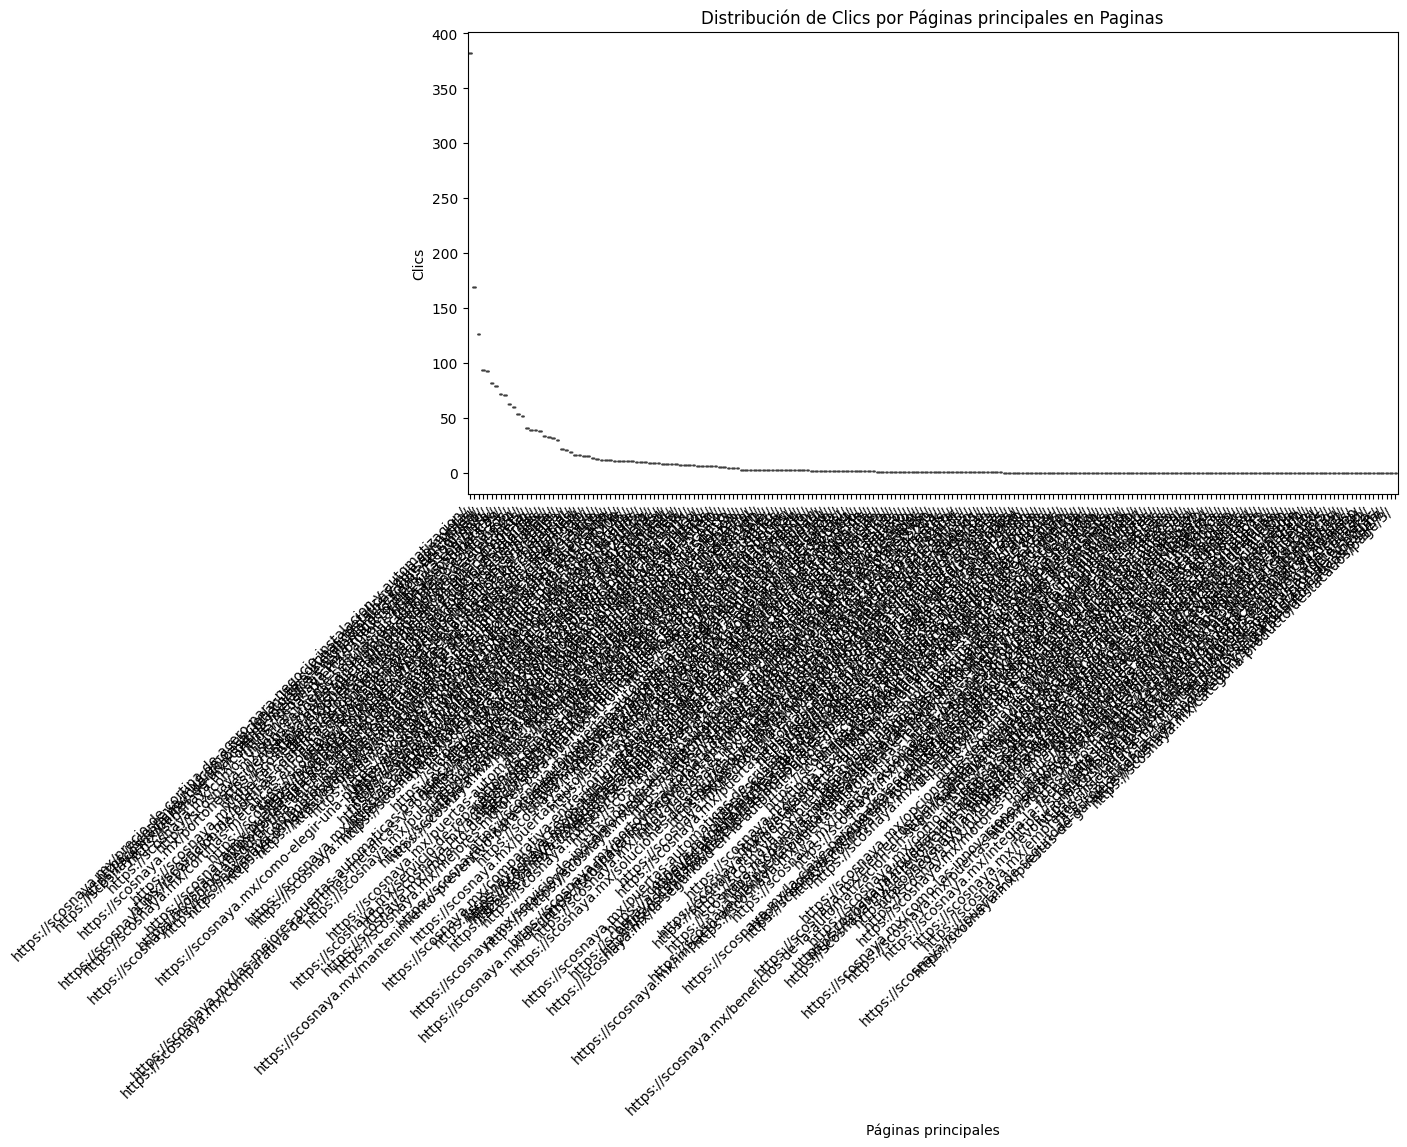

----------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'CTR' (Categórica) en 'Paginas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count  mean  std   min   25%   50%   75%   max
CTR                                                  
0%      90.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0
0.12%    1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0
0.13%    1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0
0.14%    1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0
0.15%    1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0
...      ...   ...  ...   ...   ...   ...   ...   ...
6.49%    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
6.67%    1.0   2.0  NaN   2.0   2.0   2.0   2.0   2.0
8.05%    1.0  63.0  NaN  63.0  63.0  63.0  63.0  63.0
8.33%    1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0
9.09%    1.0   1.0  NaN   1.0   1.0   1.0   1.0   1.0

[109 rows x 8 columns]

Generando Box Plot para 'Clics' por 'CTR'...


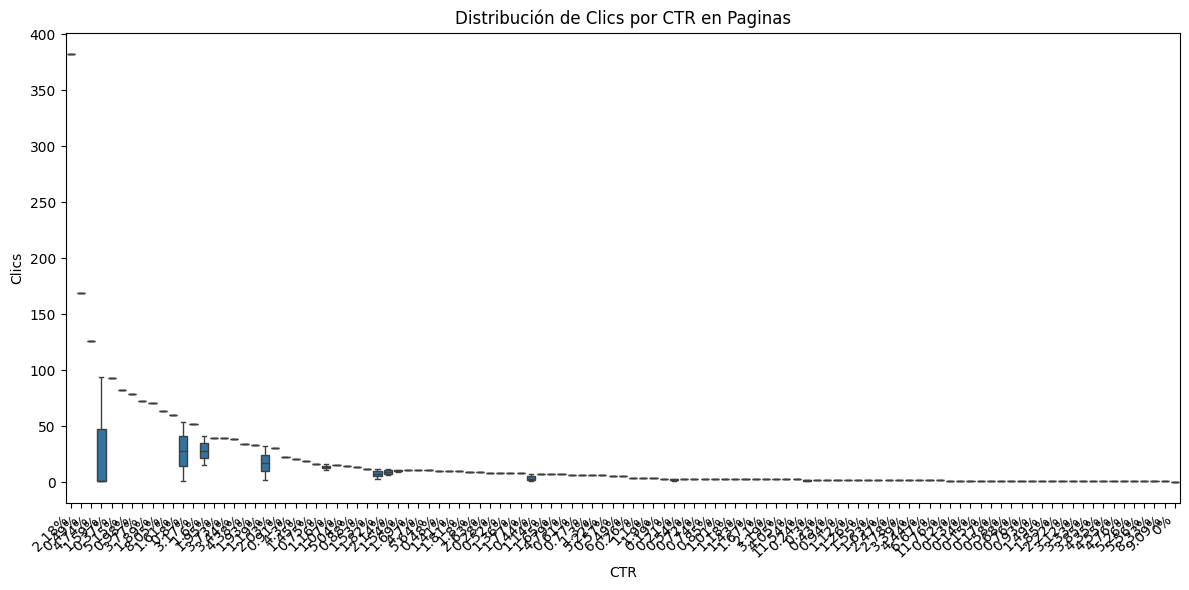

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'Páginas principales' (Categórica) en 'Paginas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
                                                    count    mean  std  \
Páginas principales                                                      
https://scosnaya.mx/                                  1.0  1910.0  NaN   
https://scosnaya.mx/accesos-industriales-tips-d...    1.0   180.0  NaN   
https://scosnaya.mx/accesos-inteligentes-tecnol...    1.0   856.0  NaN   
https://scosnaya.mx/author/web/                       1.0    55.0  NaN   
https://scosnaya.mx/beneficios-de-la-automatiza...    1.0    13.0  NaN   
...                                                   ...     ...  ...   
https://scosnaya.mx/tipos-de-puertas-automatica...    1.0   139.0  NaN   
https://scosnaya.mx/tipos-de-puertas-automatica...    1.0   133.0  NaN   
https://scosnaya.mx/ventajas-de-la-automatizaci

<ipython-input-29-7d95cf0644c7>:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ajustar para evitar que las etiquetas se corten


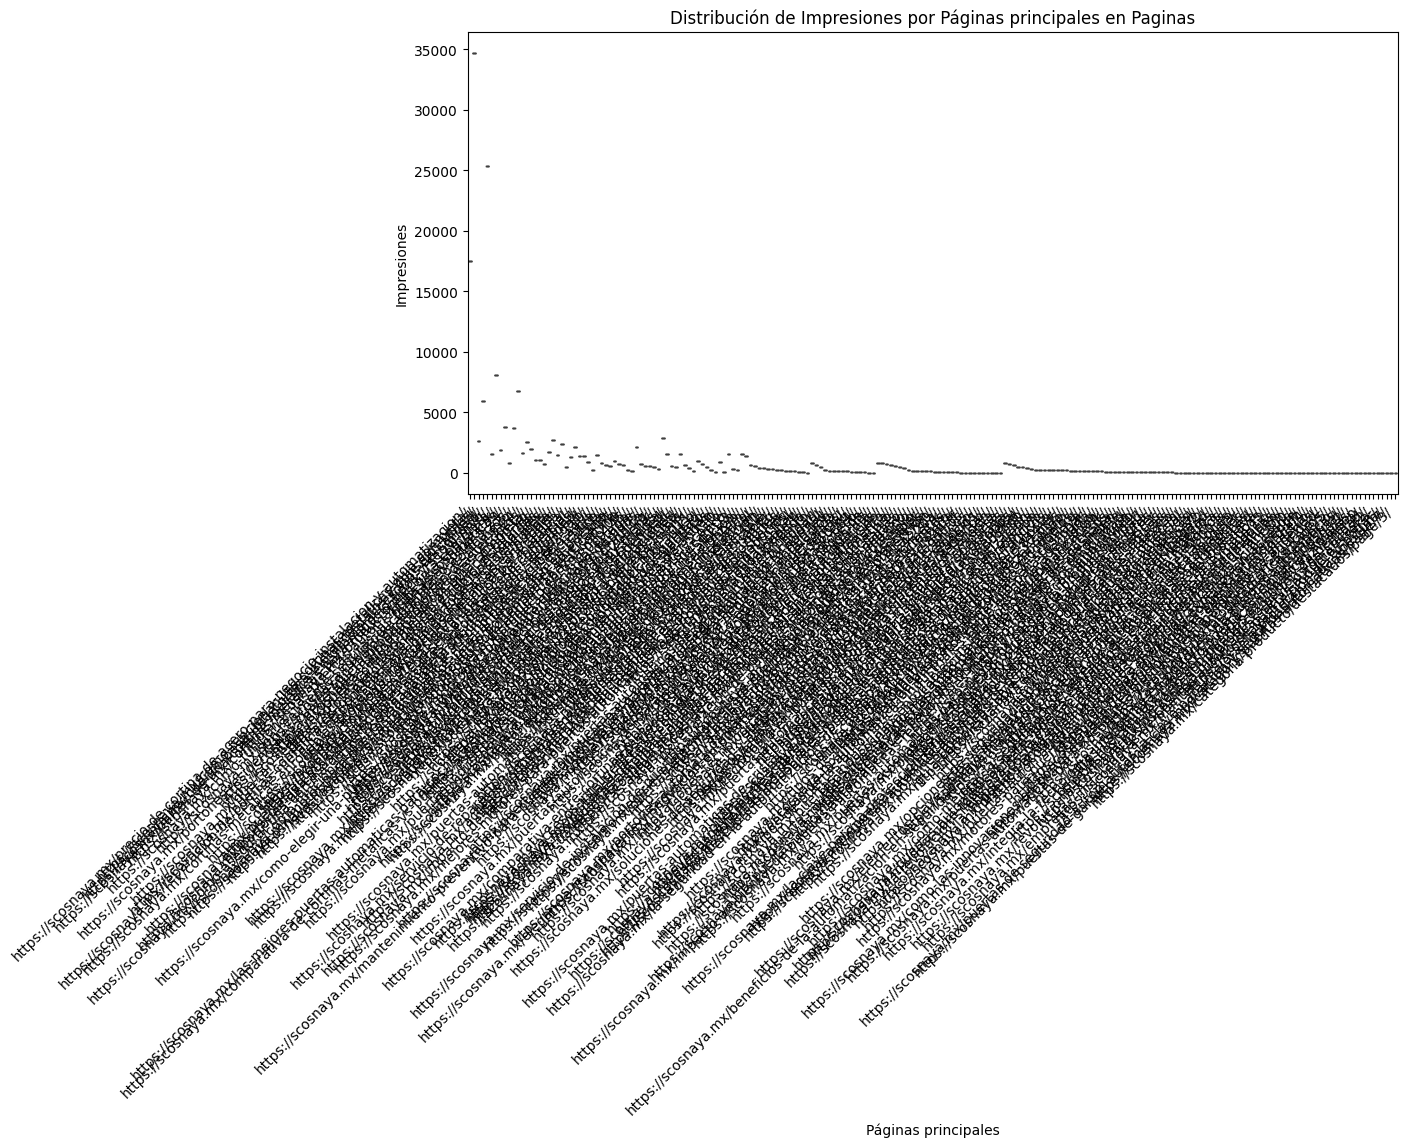

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'CTR' (Categórica) en 'Paginas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count   mean         std    min    25%    50%     75%    max
CTR                                                                
0%      90.0   90.9  157.794351    1.0    4.0   26.0  112.25  790.0
0.12%    1.0  856.0         NaN  856.0  856.0  856.0  856.00  856.0
0.13%    1.0  791.0         NaN  791.0  791.0  791.0  791.00  791.0
0.14%    1.0  705.0         NaN  705.0  705.0  705.0  705.00  705.0
0.15%    1.0  653.0         NaN  653.0  653.0  653.0  653.00  653.0
...      ...    ...         ...    ...    ...    ...     ...    ...
6.49%    1.0   77.0         NaN   77.0   77.0   77.0   77.00   77.0
6.67%    1.0   30.0         NaN   30.0   30.0   30.0   30.00   30.0
8.05%    1.0  783.0         NaN  783.0  783.0  783.0  783.00  783.0
8.33%    1.0   12.0         NaN   12.0   12.0   12.0   

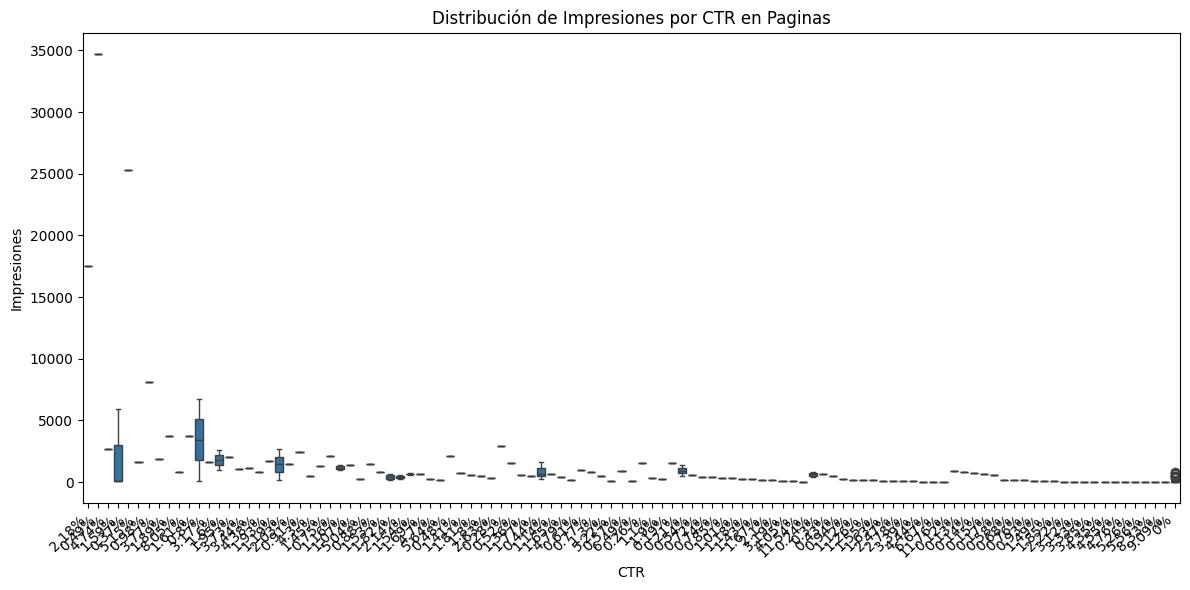

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'Páginas principales' (Categórica) en 'Paginas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
                                                    count   mean  std    min  \
Páginas principales                                                            
https://scosnaya.mx/                                  1.0  15.98  NaN  15.98   
https://scosnaya.mx/accesos-industriales-tips-d...    1.0  26.78  NaN  26.78   
https://scosnaya.mx/accesos-inteligentes-tecnol...    1.0  35.93  NaN  35.93   
https://scosnaya.mx/author/web/                       1.0   4.45  NaN   4.45   
https://scosnaya.mx/beneficios-de-la-automatiza...    1.0   6.62  NaN   6.62   
...                                                   ...    ...  ...    ...   
https://scosnaya.mx/tipos-de-puertas-automatica...    1.0  63.06  NaN  63.06   
https://scosnaya.mx/tipos-de-puertas-automatica...    1.0  51.43  NaN 

<ipython-input-29-7d95cf0644c7>:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ajustar para evitar que las etiquetas se corten


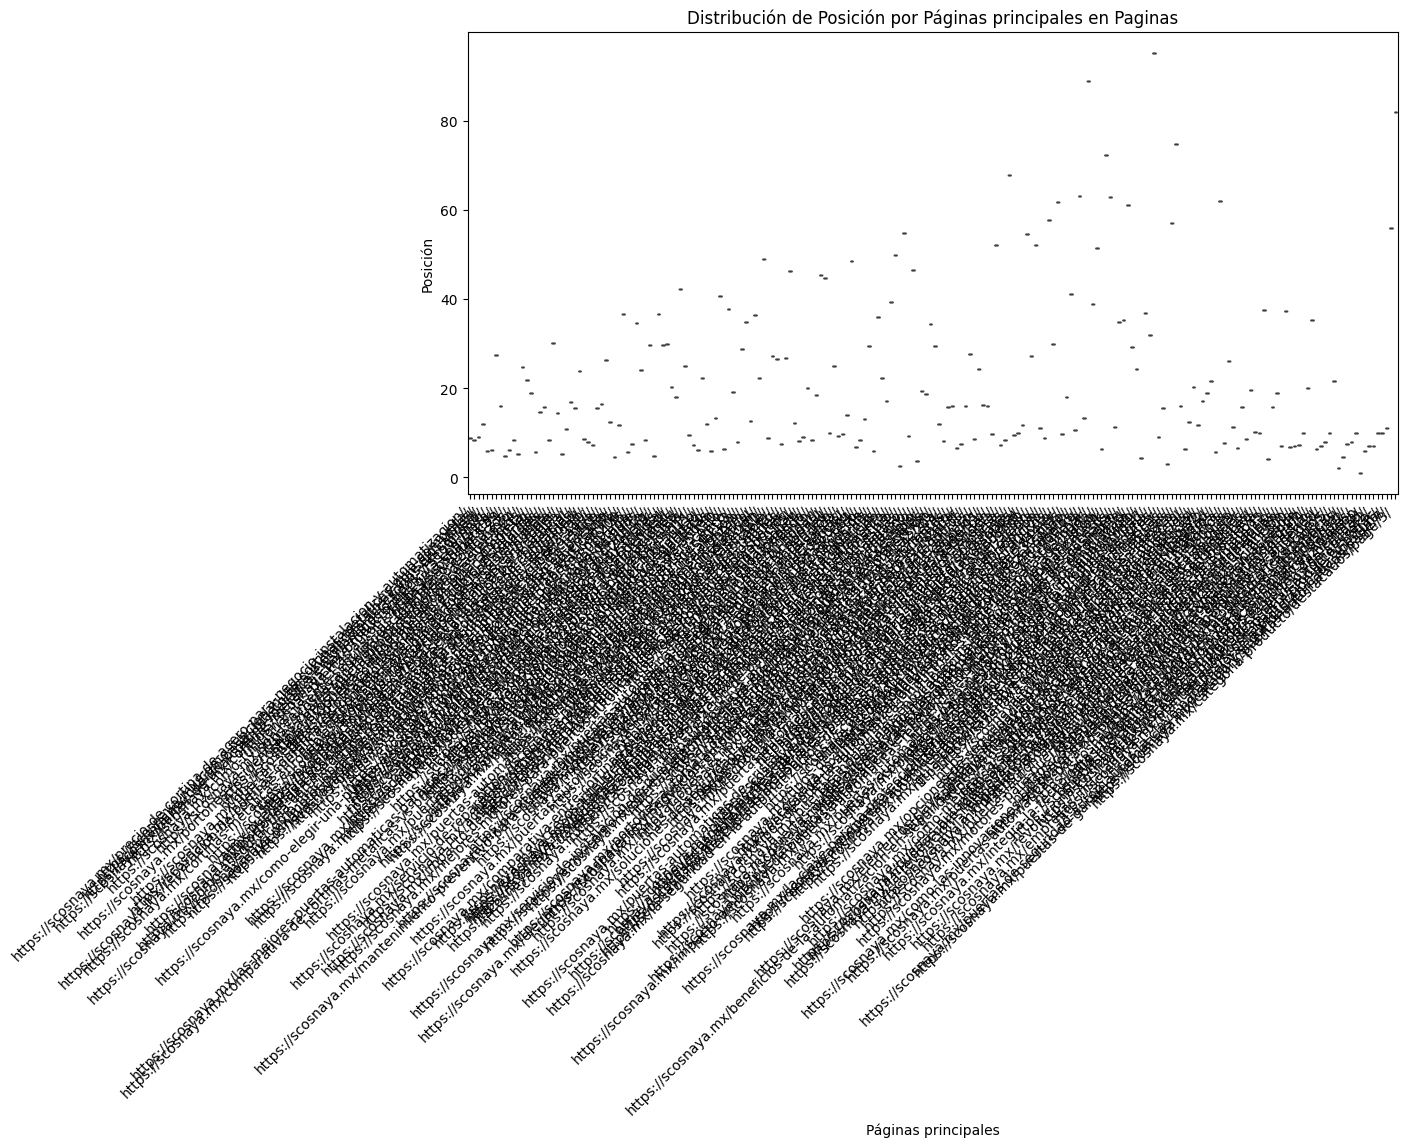

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'CTR' (Categórica) en 'Paginas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count       mean        std    min     25%    50%    75%    max
CTR                                                                   
0%      90.0  24.450889  22.820782   1.00   8.095  12.86  35.25  95.17
0.12%    1.0  35.930000        NaN  35.93  35.930  35.93  35.93  35.93
0.13%    1.0  22.290000        NaN  22.29  22.290  22.29  22.29  22.29
0.14%    1.0  17.020000        NaN  17.02  17.020  17.02  17.02  17.02
0.15%    1.0  39.240000        NaN  39.24  39.240  39.24  39.24  39.24
...      ...        ...        ...    ...     ...    ...    ...    ...
6.49%    1.0   6.440000        NaN   6.44   6.440   6.44   6.44   6.44
6.67%    1.0  29.370000        NaN  29.37  29.370  29.37  29.37  29.37
8.05%    1.0   6.190000        NaN   6.19   6.190   6.19   6.19   6.19
8.33%    1.0  52.000000  

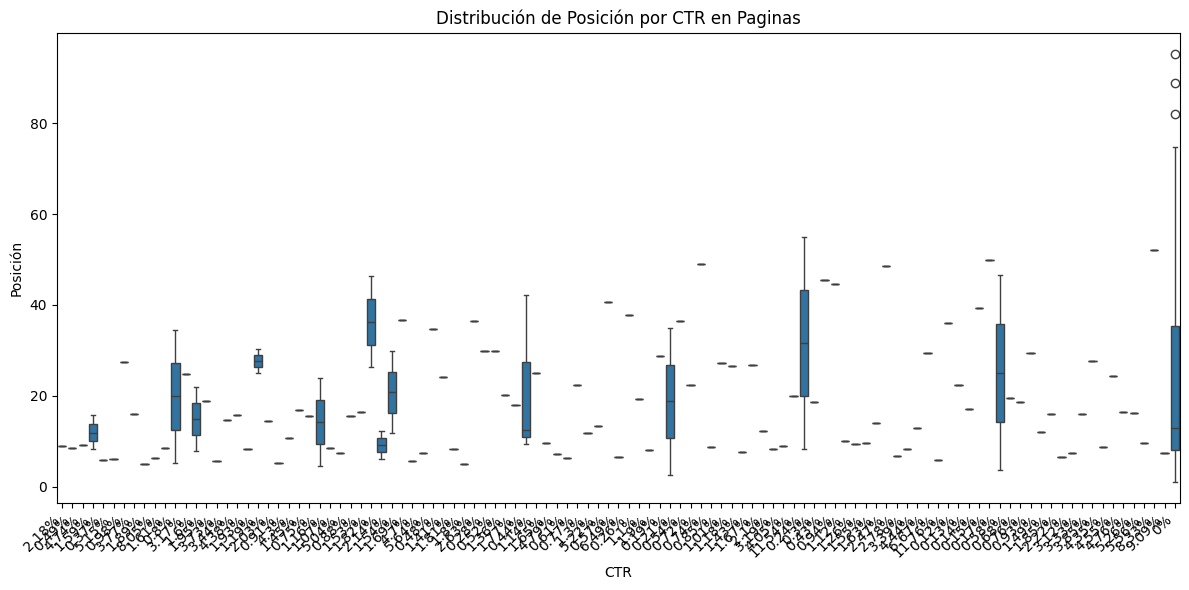

----------------------------------------

============================== Fin Análisis para DataFrame: 'Paginas' ==============================


============================== Procesando DataFrame: 'Filtros' ==============================
  Columnas Numéricas encontradas (0): 
  Columnas Categóricas (por dtype) encontradas (2): Filtrar, Valor
----------------------------------------------------------------------
  El DataFrame 'Filtros' no tiene suficientes columnas numéricas Y categóricas (basado en dtype) para realizar análisis bivariado.
  Saltando análisis bivariado para este DataFrame.

============================== Procesando DataFrame: 'Paises' ==============================
  Columnas Numéricas encontradas (3): Clics, Impresiones, Posición
  Columnas Categóricas (por dtype) encontradas (2): País, CTR
----------------------------------------------------------------------
  Procediendo a analizar 6 pares posibles (Numérica vs. Categórica)...
-------------------------------------

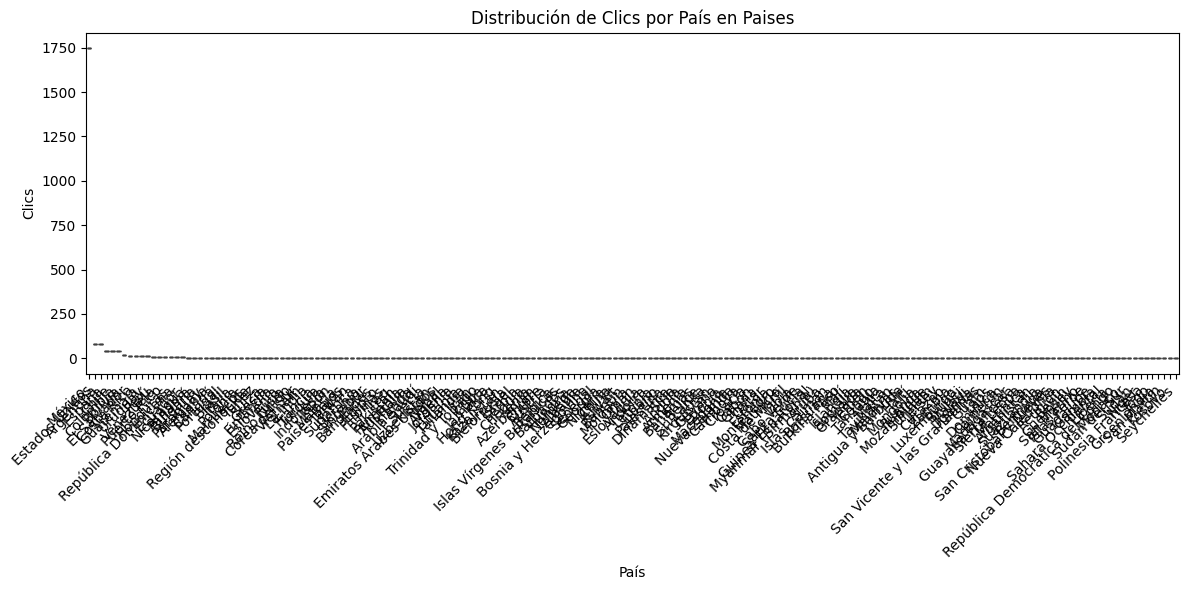

----------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'CTR' (Categórica) en 'Paises' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count    mean        std     min      25%     50%      75%     max
CTR                                                                      
0%     153.0     0.0   0.000000     0.0     0.00     0.0     0.00     0.0
0.02%    1.0     1.0        NaN     1.0     1.00     1.0     1.00     1.0
0.12%    1.0     1.0        NaN     1.0     1.00     1.0     1.00     1.0
0.24%    1.0     2.0        NaN     2.0     2.00     2.0     2.00     2.0
0.34%    1.0     2.0        NaN     2.0     2.00     2.0     2.00     2.0
0.43%    2.0     2.5   2.121320     1.0     1.75     2.5     3.25     4.0
0.48%    2.0     2.0   1.414214     1.0     1.50     2.0     2.50     3.0
0.53%    1.0     5.0        NaN     5.0     5.00     5.0     5.00     5.0
0.54%    1.0    80.0        NaN    80.0    80.00    80.0    80.00    8

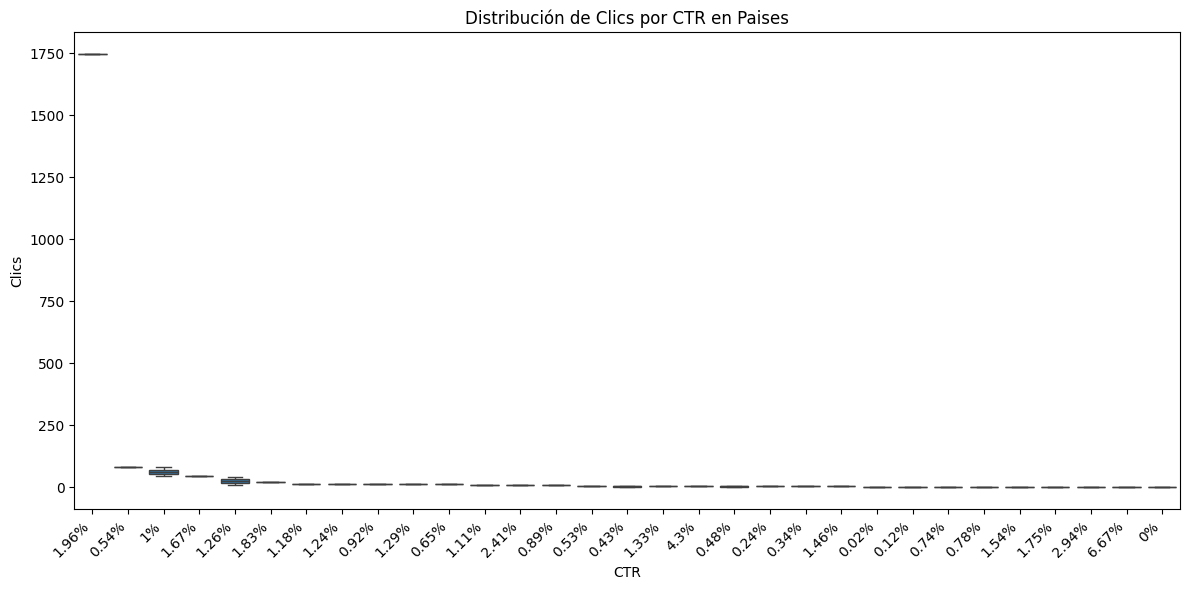

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'País' (Categórica) en 'Paises' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
            count    mean  std     min     25%     50%     75%     max
País                                                                  
Afganistán    1.0     2.0  NaN     2.0     2.0     2.0     2.0     2.0
Albania       1.0    39.0  NaN    39.0    39.0    39.0    39.0    39.0
Alemania      1.0   830.0  NaN   830.0   830.0   830.0   830.0   830.0
Andorra       1.0    22.0  NaN    22.0    22.0    22.0    22.0    22.0
Angola        1.0    20.0  NaN    20.0    20.0    20.0    20.0    20.0
...           ...     ...  ...     ...     ...     ...     ...     ...
Uzbekistán    1.0   119.0  NaN   119.0   119.0   119.0   119.0   119.0
Venezuela     1.0   719.0  NaN   719.0   719.0   719.0   719.0   719.0
Vietnam       1.0  1530.0  NaN  1530.0  1530.0  1530.0  1530.0  1530.0
Yemen         1.0     

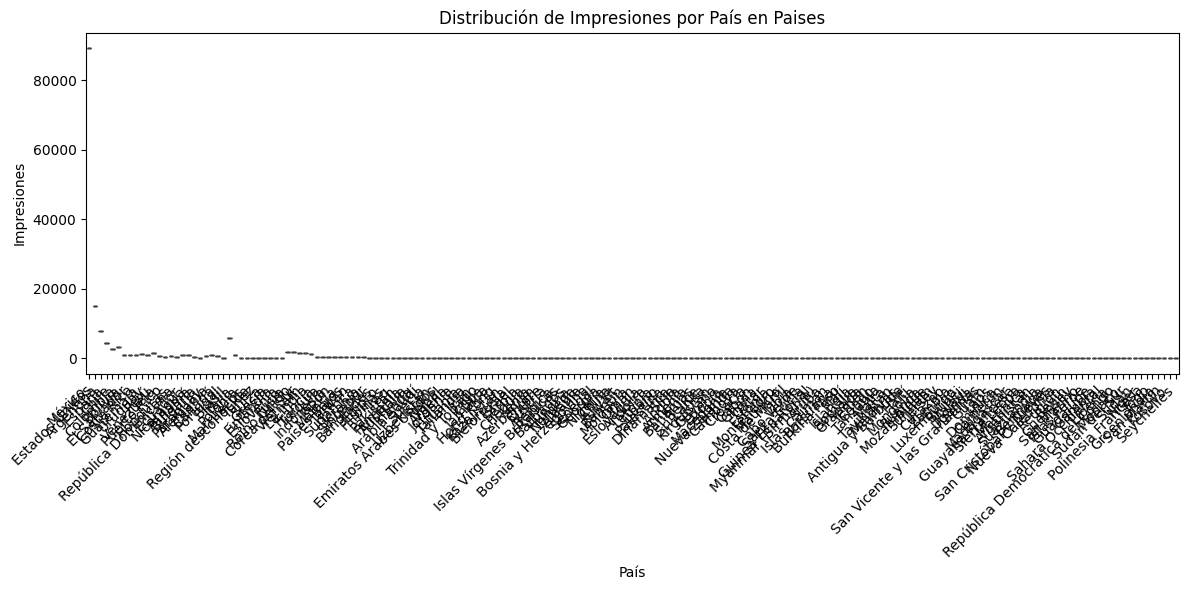

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'CTR' (Categórica) en 'Paises' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count          mean          std      min       25%      50%       75%  \
CTR                                                                             
0%     153.0    104.019608   294.826677      1.0      3.00     14.0     64.00   
0.02%    1.0   5962.000000          NaN   5962.0   5962.00   5962.0   5962.00   
0.12%    1.0    847.000000          NaN    847.0    847.00    847.0    847.00   
0.24%    1.0    830.000000          NaN    830.0    830.00    830.0    830.00   
0.34%    1.0    597.000000          NaN    597.0    597.00    597.0    597.00   
0.43%    2.0    576.500000   488.610786    231.0    403.75    576.5    749.25   
0.48%    2.0    418.500000   296.277741    209.0    313.75    418.5    523.25   
0.53%    1.0    944.000000          NaN    944.0    944.00    944.0    944.

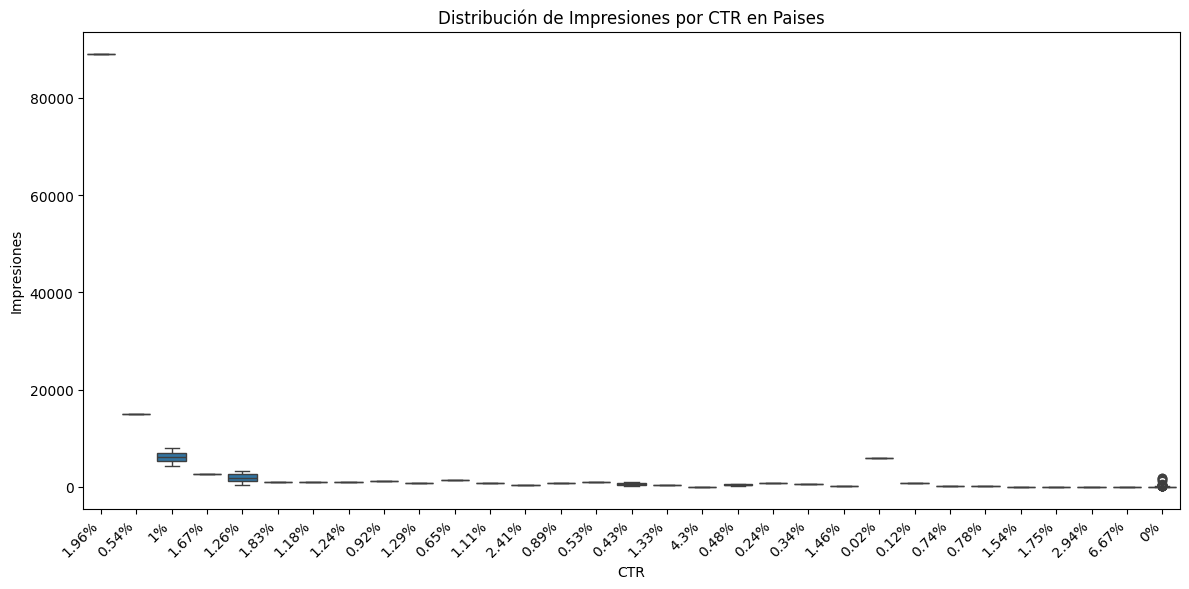

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'País' (Categórica) en 'Paises' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
            count   mean  std    min    25%    50%    75%    max
País                                                            
Afganistán    1.0  32.00  NaN  32.00  32.00  32.00  32.00  32.00
Albania       1.0  45.33  NaN  45.33  45.33  45.33  45.33  45.33
Alemania      1.0  38.47  NaN  38.47  38.47  38.47  38.47  38.47
Andorra       1.0   8.82  NaN   8.82   8.82   8.82   8.82   8.82
Angola        1.0  33.30  NaN  33.30  33.30  33.30  33.30  33.30
...           ...    ...  ...    ...    ...    ...    ...    ...
Uzbekistán    1.0  40.63  NaN  40.63  40.63  40.63  40.63  40.63
Venezuela     1.0  12.32  NaN  12.32  12.32  12.32  12.32  12.32
Vietnam       1.0  43.41  NaN  43.41  43.41  43.41  43.41  43.41
Yemen         1.0  45.40  NaN  45.40  45.40  45.40  45.40  45.40
Zambia        1.0  23.33  

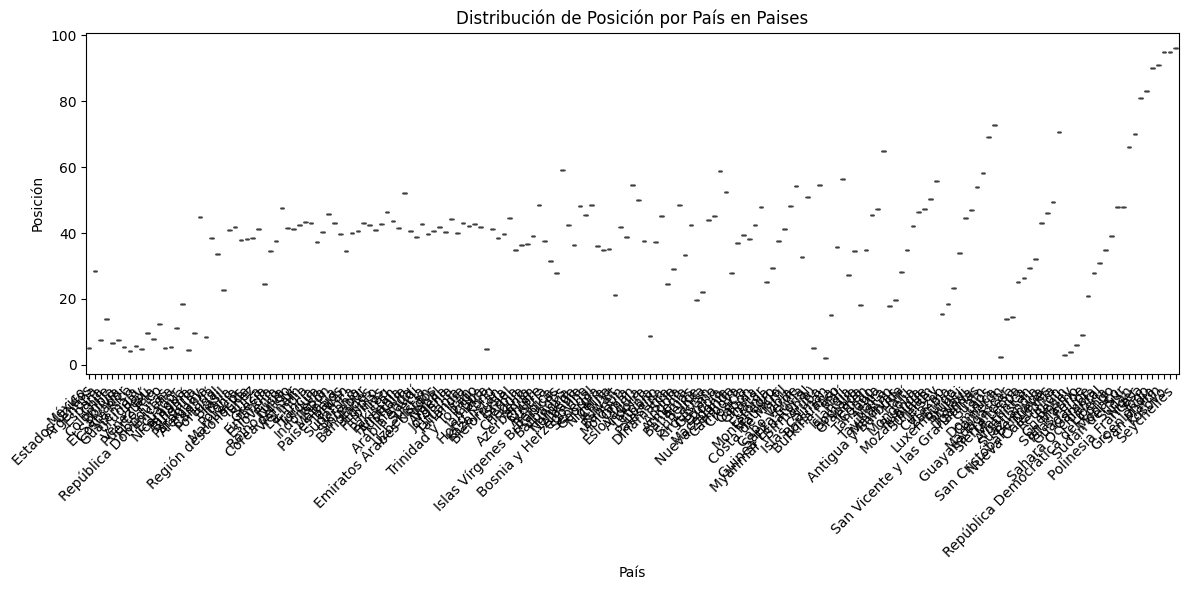

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'CTR' (Categórica) en 'Paises' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count       mean        std    min      25%     50%      75%    max
CTR                                                                       
0%     153.0  40.463333  17.570657   2.00  33.3000  40.930  47.0000  96.00
0.02%    1.0  40.810000        NaN  40.81  40.8100  40.810  40.8100  40.81
0.12%    1.0  41.750000        NaN  41.75  41.7500  41.750  41.7500  41.75
0.24%    1.0  38.470000        NaN  38.47  38.4700  38.470  38.4700  38.47
0.34%    1.0  33.760000        NaN  33.76  33.7600  33.760  33.7600  33.76
0.43%    2.0  21.145000  23.511300   4.52  12.8325  21.145  29.4575  37.77
0.48%    2.0  23.385000  20.909148   8.60  15.9925  23.385  30.7775  38.17
0.53%    1.0  18.560000        NaN  18.56  18.5600  18.560  18.5600  18.56
0.54%    1.0  28.500000        NaN  28.50  28.5000  28.50

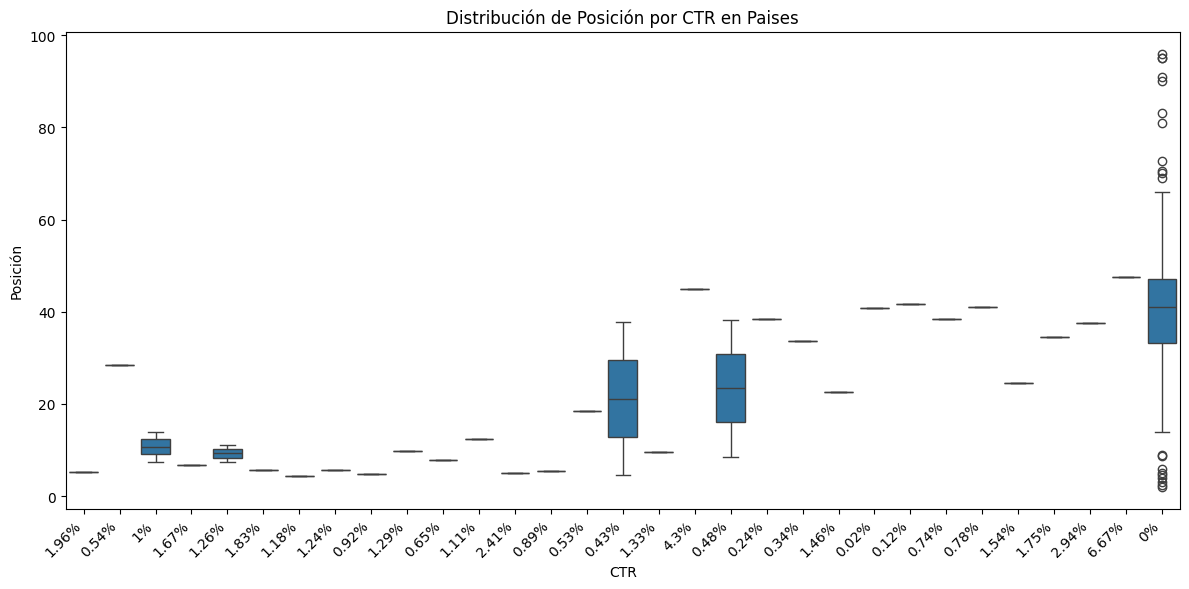

----------------------------------------

============================== Fin Análisis para DataFrame: 'Paises' ==============================


============================== Procesando DataFrame: 'Aparicion_en_busquedas' ==============================
  Columnas Numéricas encontradas (3): Clics, Impresiones, Posición
  Columnas Categóricas (por dtype) encontradas (2): Aparición en búsquedas, CTR
----------------------------------------------------------------------
  Procediendo a analizar 6 pares posibles (Numérica vs. Categórica)...
----------------------------------------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'Aparición en búsquedas' (Categórica) en 'Aparicion_en_busquedas' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
  Saltando estadísticas/plot para 'Clics' vs 'Aparición en búsquedas': Columna categórica tiene < 2 valores únicos o numérica sin datos no nulos.
----------------------------------------

>>> Analizando 

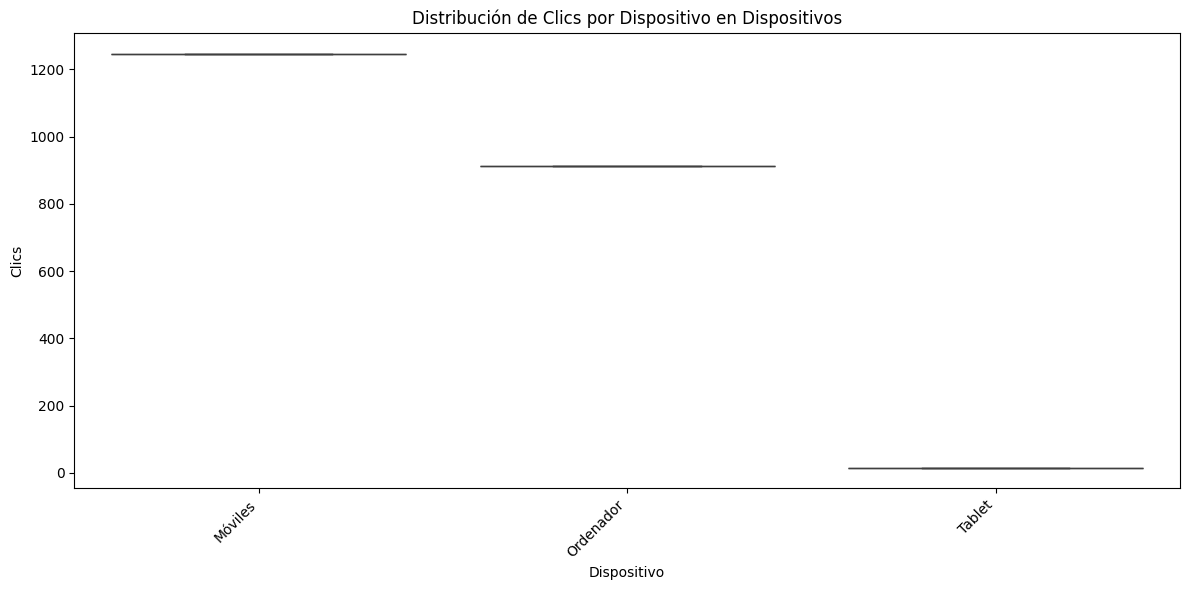

----------------------------------------

>>> Analizando par: 'Clics' (Numérica) vs 'CTR' (Categórica) en 'Dispositivos' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count    mean  std     min     25%     50%     75%     max
CTR                                                              
1.26%    1.0  1247.0  NaN  1247.0  1247.0  1247.0  1247.0  1247.0
1.52%    1.0   913.0  NaN   913.0   913.0   913.0   913.0   913.0
2.56%    1.0    16.0  NaN    16.0    16.0    16.0    16.0    16.0

Generando Box Plot para 'Clics' por 'CTR'...


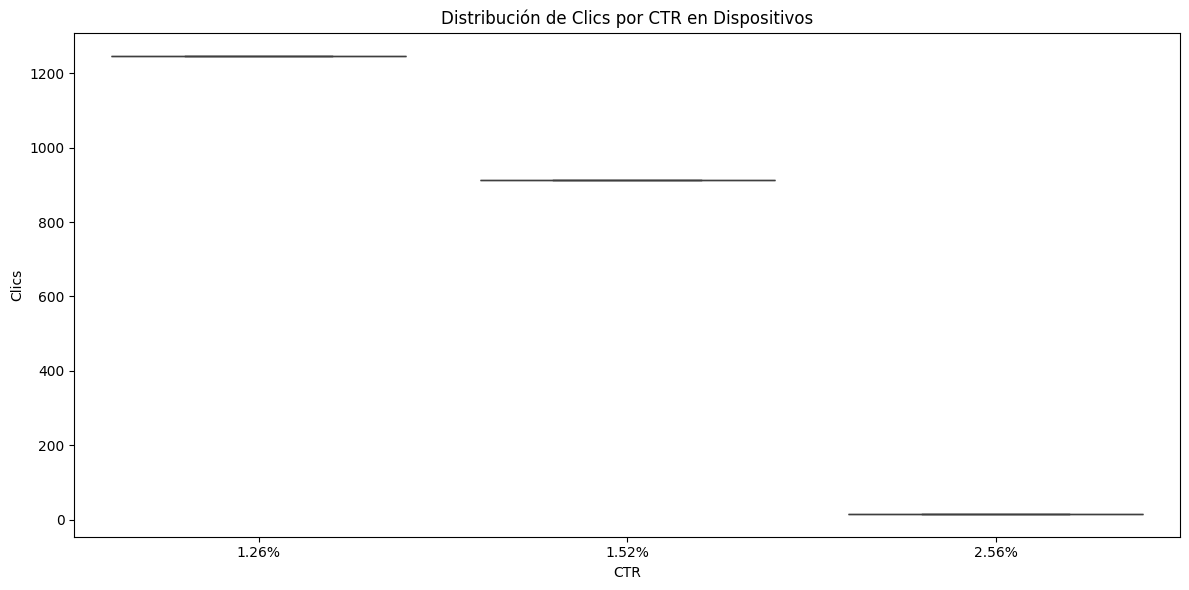

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'Dispositivo' (Categórica) en 'Dispositivos' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
             count     mean  std      min      25%      50%      75%      max
Dispositivo                                                                  
Móviles        1.0  98863.0  NaN  98863.0  98863.0  98863.0  98863.0  98863.0
Ordenador      1.0  59901.0  NaN  59901.0  59901.0  59901.0  59901.0  59901.0
Tablet         1.0    626.0  NaN    626.0    626.0    626.0    626.0    626.0

Generando Box Plot para 'Impresiones' por 'Dispositivo'...


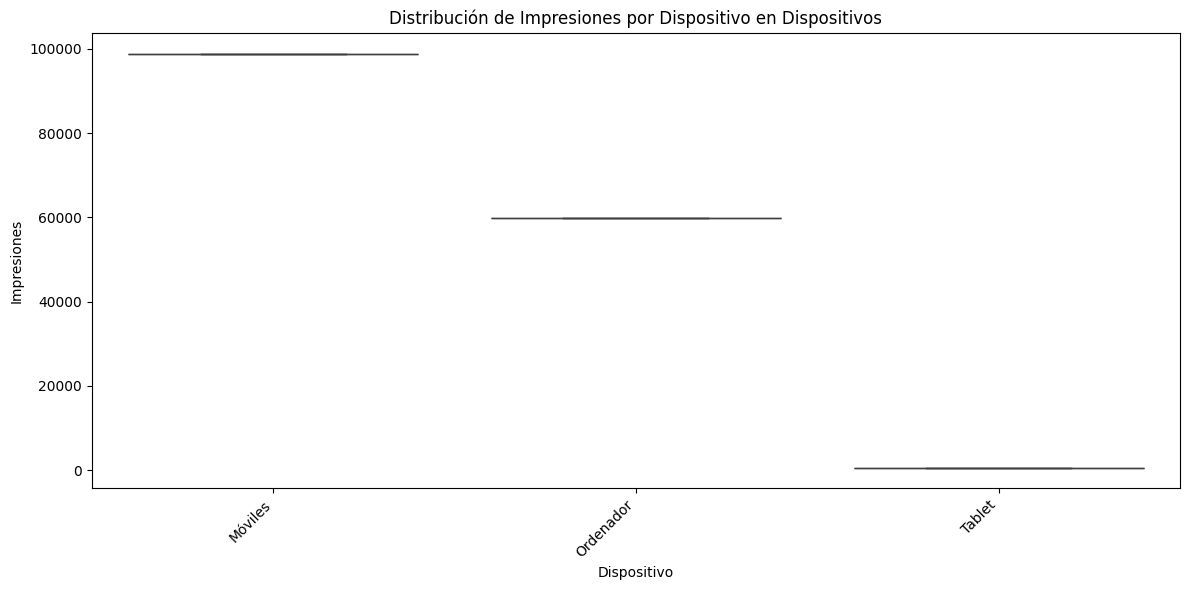

----------------------------------------

>>> Analizando par: 'Impresiones' (Numérica) vs 'CTR' (Categórica) en 'Dispositivos' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count     mean  std      min      25%      50%      75%      max
CTR                                                                    
1.26%    1.0  98863.0  NaN  98863.0  98863.0  98863.0  98863.0  98863.0
1.52%    1.0  59901.0  NaN  59901.0  59901.0  59901.0  59901.0  59901.0
2.56%    1.0    626.0  NaN    626.0    626.0    626.0    626.0    626.0

Generando Box Plot para 'Impresiones' por 'CTR'...


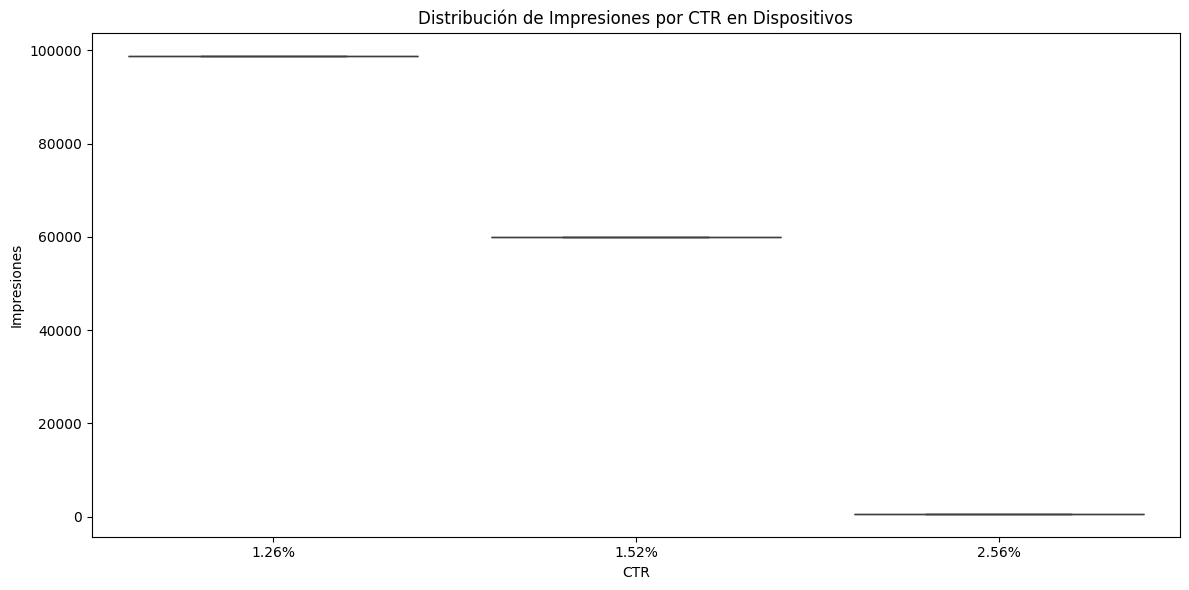

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'Dispositivo' (Categórica) en 'Dispositivos' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
             count   mean  std    min    25%    50%    75%    max
Dispositivo                                                      
Móviles        1.0   9.20  NaN   9.20   9.20   9.20   9.20   9.20
Ordenador      1.0  21.05  NaN  21.05  21.05  21.05  21.05  21.05
Tablet         1.0   5.15  NaN   5.15   5.15   5.15   5.15   5.15

Generando Box Plot para 'Posición' por 'Dispositivo'...


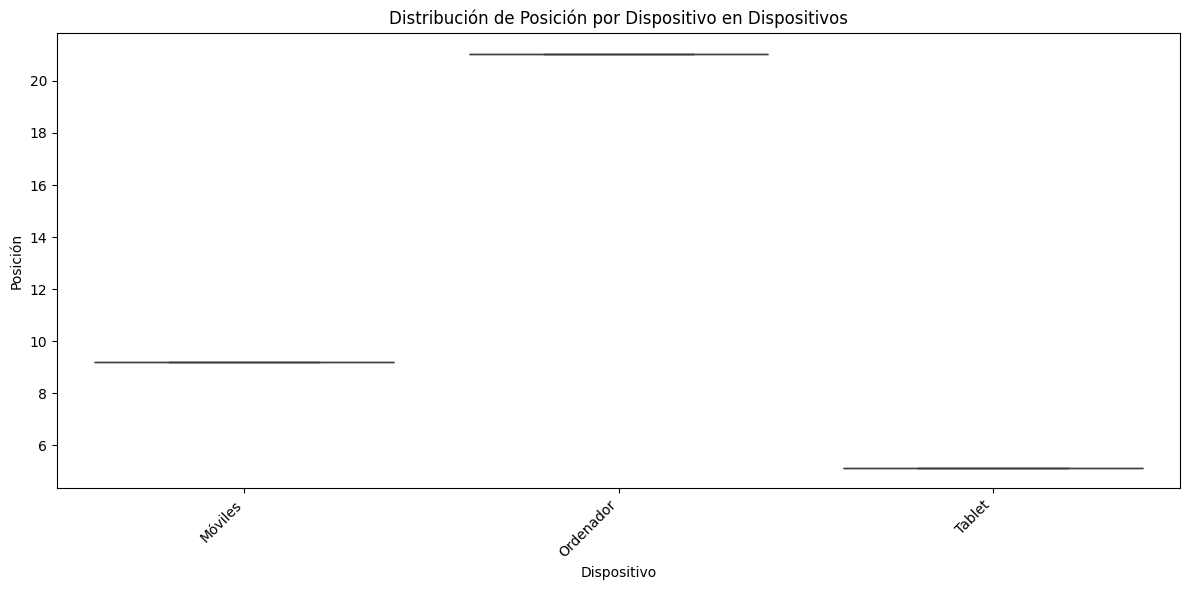

----------------------------------------

>>> Analizando par: 'Posición' (Numérica) vs 'CTR' (Categórica) en 'Dispositivos' <<<

Estadísticas Descriptivas de la variable numérica por cada categoría:
       count   mean  std    min    25%    50%    75%    max
CTR                                                        
1.26%    1.0   9.20  NaN   9.20   9.20   9.20   9.20   9.20
1.52%    1.0  21.05  NaN  21.05  21.05  21.05  21.05  21.05
2.56%    1.0   5.15  NaN   5.15   5.15   5.15   5.15   5.15

Generando Box Plot para 'Posición' por 'CTR'...


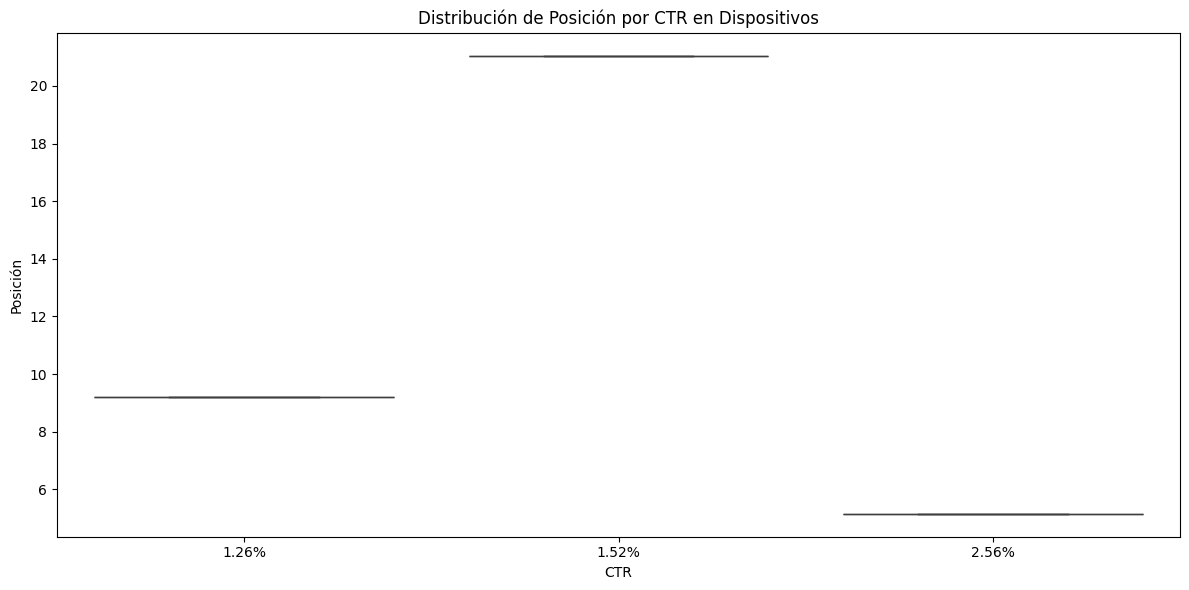

----------------------------------------

============================== Fin Análisis para DataFrame: 'Dispositivos' ==============================


--- Fin del Análisis Bivariado Automático Completo ---


In [ ]:
# Lista de los nombres de las variables (DataFrames) que quieres inspeccionar
nombres_dataframes = [
    "Fechas",
    "Consultas",
    "Paginas",
    "Filtros",
    "Paises",
    "Aparicion_en_busquedas",
    "Dispositivos"
]

print("--- Iniciando Análisis Bivariado Automático (Numérica vs. Categórica) ---\n")
print(">>> ATENCIÓN: Este proceso analizará CADA par de columna numérica vs. columna categórica (dtype object/category/bool) en cada DataFrame encontrado que tenga ambos tipos de columnas.")
print(">>> La salida puede ser MUY extensa, con muchas tablas de estadísticas y gráficos generados consecutivamente.")
print(">>> Si la salida es demasiado grande o lenta, considera detener la ejecución y usar el código anterior para analizar pares específicos de forma manual.")
print("\n" + "="*80 + "\n")


for nombre_df in nombres_dataframes:
    print(f"\n{'='*30} Procesando DataFrame: '{nombre_df}' {'='*30}")
    try:
        # Intenta acceder a la variable global con el nombre especificado
        dataframe_actual = globals()[nombre_df]

        # Verifica si es realmente un DataFrame de Pandas
        if isinstance(dataframe_actual, pd.DataFrame):

            # Identificar columnas numéricas
            numerical_cols = dataframe_actual.select_dtypes(include=['number']).columns.tolist()

            # Identificar columnas categóricas (basado en dtype 'object', 'category', 'bool')
            # Estas son las columnas que usaremos para agrupar.
            categorical_cols = dataframe_actual.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

            print(f"  Columnas Numéricas encontradas ({len(numerical_cols)}): {', '.join(numerical_cols)}")
            print(f"  Columnas Categóricas (por dtype) encontradas ({len(categorical_cols)}): {', '.join(categorical_cols)}")
            print("-" * 70)

            # Verificar si hay columnas de ambos tipos para realizar el análisis bivariado
            if not numerical_cols or not categorical_cols:
                print(f"  El DataFrame '{nombre_df}' no tiene suficientes columnas numéricas Y categóricas (basado en dtype) para realizar análisis bivariado.")
                print(f"  Saltando análisis bivariado para este DataFrame.")
                print("=" * 80)
                continue # Pasa al siguiente DataFrame en la lista

            print(f"  Procediendo a analizar {len(numerical_cols) * len(categorical_cols)} pares posibles (Numérica vs. Categórica)...")
            print("-" * 70)

            # --- Realizar el análisis bivariado para cada par ---

            # Iterar sobre cada columna numérica
            for num_col in numerical_cols:
                # Iterar sobre cada columna categórica
                for cat_col in categorical_cols:
                    print(f"\n>>> Analizando par: '{num_col}' (Numérica) vs '{cat_col}' (Categórica) en '{nombre_df}' <<<")

                    # --- 1. Estadísticas Descriptivas por Categoría ---
                    print("\nEstadísticas Descriptivas de la variable numérica por cada categoría:")
                    try:
                         # Asegurarse de que haya suficientes categorías para agrupar (al menos 2)
                         # y que la columna numérica tenga valores para describir
                         if dataframe_actual[cat_col].nunique() < 2 or dataframe_actual[num_col].dropna().empty:
                              print(f"  Saltando estadísticas/plot para '{num_col}' vs '{cat_col}': Columna categórica tiene < 2 valores únicos o numérica sin datos no nulos.")
                         else:
                            # Agrupa por la columna categórica y describe la columna numérica
                            # .dropna() en la columna categórica antes de groupby evita errores si hay NaNs y dropna=True no es deseado en groupby
                            # O simplemente deja groupby manejar NaNs por defecto si es apropiado
                            grouped_stats = dataframe_actual.groupby(cat_col)[num_col].describe()
                            print(grouped_stats)

                            # --- 2. Visualización: Box Plot ---
                            print(f"\nGenerando Box Plot para '{num_col}' por '{cat_col}'...")
                            try:
                                plt.figure(figsize=(12, 6)) # Ajusta el tamaño si esperas muchas categorías
                                sns.boxplot(x=cat_col, y=num_col, data=dataframe_actual)
                                plt.title(f'Distribución de {num_col} por {cat_col} en {nombre_df}')
                                plt.xlabel(cat_col)
                                plt.ylabel(num_col)

                                # Rotar etiquetas del eje X si hay muchas categorías o nombres largos
                                # Umbral de 5 categorías o longitud máxima de etiqueta > 5 caracteres
                                max_label_len = dataframe_actual[cat_col].astype(str).str.len().max() if dataframe_actual[cat_col].dropna().shape[0] > 0 else 0
                                if dataframe_actual[cat_col].nunique() > 5 or max_label_len > 5:
                                     plt.xticks(rotation=45, ha='right') # ha='right' ayuda a alinear al rotar

                                plt.tight_layout() # Ajustar para evitar que las etiquetas se corten
                                plt.show()

                            except Exception as e_plot:
                                 print(f"  ERROR al generar Box Plot para '{num_col}' vs '{cat_col}': {e_plot}")
                                 plt.close() # Asegurarse de cerrar la figura incluso si falla el plot

                    except Exception as e_stats:
                         print(f"  ERROR al calcular estadísticas o preparar plot para '{num_col}' vs '{cat_col}': {e_stats}")


                    print("-" * 40) # Separador entre análisis de pares


            print(f"\n{'='*30} Fin Análisis para DataFrame: '{nombre_df}' {'='*30}\n") # Separador al final del DataFrame


        else:
            print(f"\nERROR: La variable '{nombre_df}' existe, pero no es un DataFrame de Pandas. Tipo encontrado: {type(dataframe_actual)}. Saltando.")
            print("=" * 80)


    except NameError:
        print(f"\nERROR: No se encontró la variable (DataFrame) llamada '{nombre_df}'. Asegúrate de que el nombre en la lista 'nombres_dataframes' es correcto y la variable fue creada. Saltando.")
        print("=" * 80)

    except Exception as e:
        print(f"\nERROR inesperado al procesar el DataFrame completo '{nombre_df}': {e}")
        # import traceback
        # traceback.print_exc(file=sys.stdout)
        print("=" * 80)


print("\n--- Fin del Análisis Bivariado Automático Completo ---")

Aún no se determina la variable objetivo, dado que faltan fuentes de datos. A partir de esta primera revisión podemos afirmar que se puede incrementar las impresiones para Brand Marketing o los clics para Performance Marketing. Aún estamos en el análisis.